<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/projeto_bloco_at.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  Caderno TP1 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Previsao de doenças cardiacas
Resumo: Objetivo desse conjunto de dados e usar as caracteristicas [features] de um paciente para treinar um modelo que possa prever se ele tem ou nao uma doença cardiaca
Pra isso o codigo utiliza o algoritmo K-Nearest Neighbors [KNN] e executa um processo para encontrar o melhor valor para o parametro K, a fim de maximizar a precisao [acuracia] do modelo.
E um problema de classificacao binaria, onde o resultado e 'Sim' [possui a doença] ou 'Não' [nao possui a doença].
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

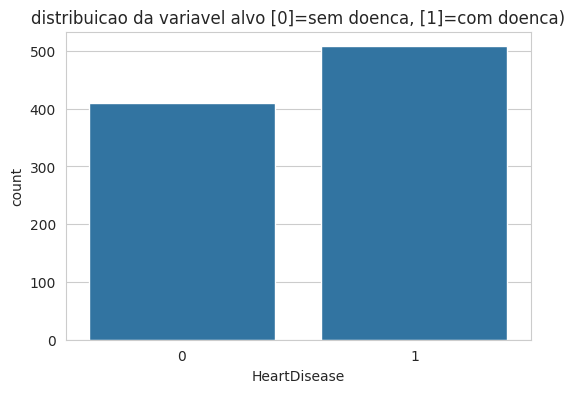

^:cria uma nova figura para o grafico com tamanho 6x4 #1
^:cria um grafico de contagem para a coluna 'heartdisease' #2 

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64
^:calcula e mostra a proporcao de cada valor na coluna 'heartdisease' #3
conclusao:as classes sao relativamente balanceadas [~55% vs 45%].
1.3)- analise das variaveis categoricas


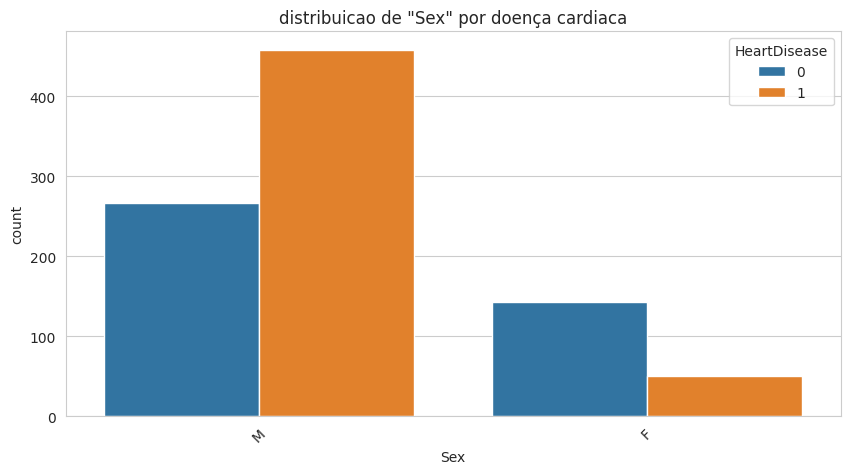

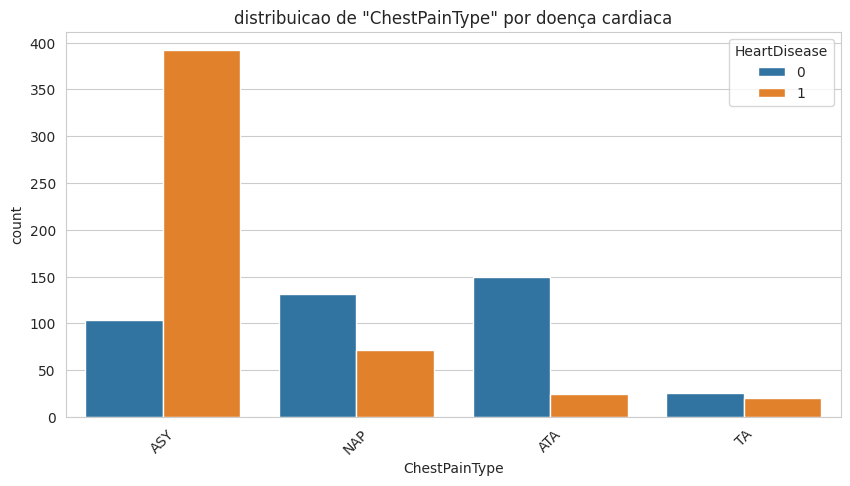

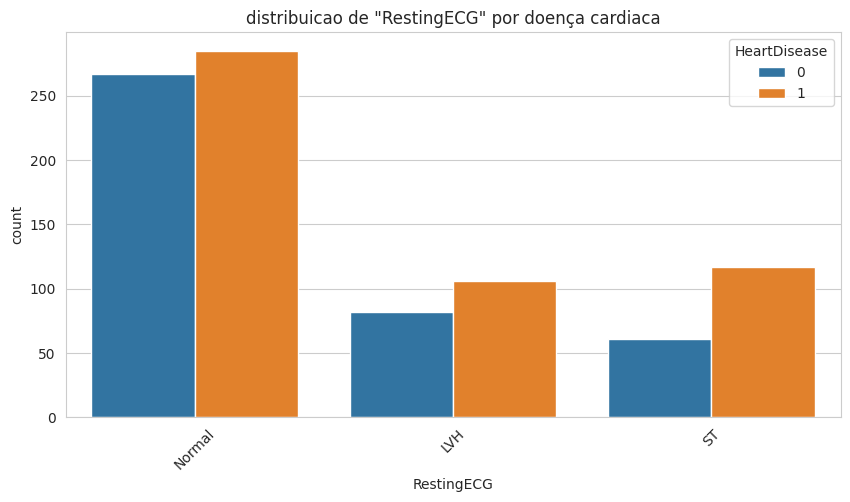

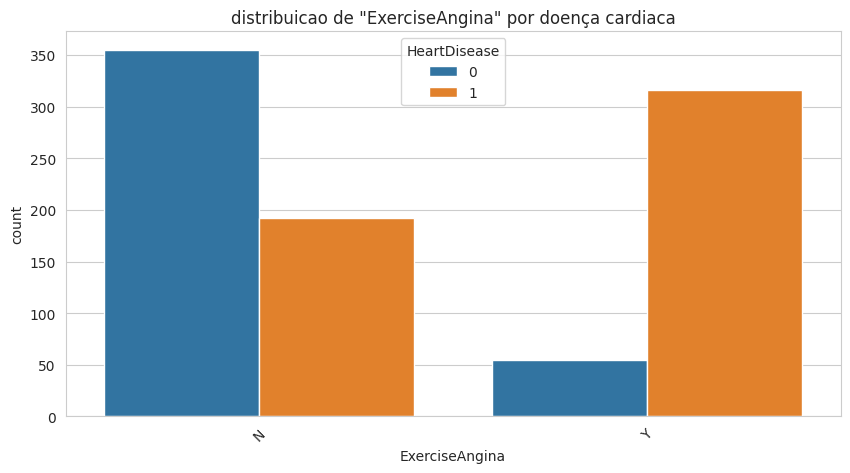

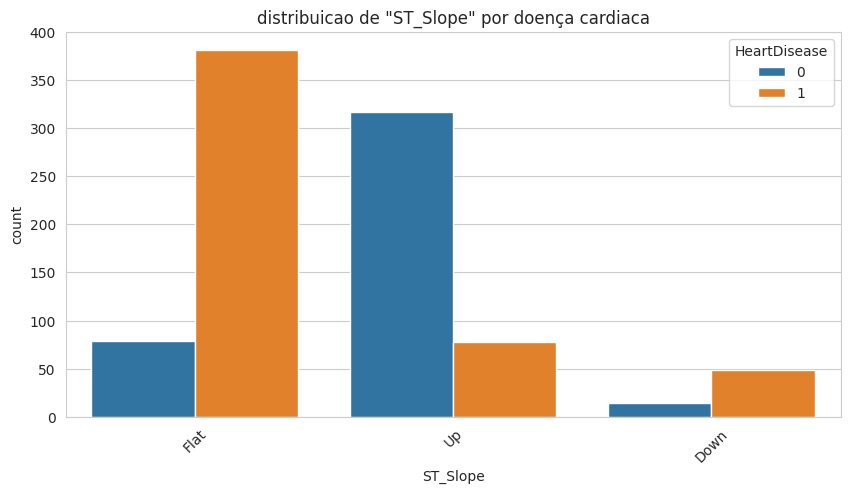

^:seleciona e armazena os nomes das colunas que sao do tipo 'object' [texto]  #4 
^:inicia um loop que passara por cada nome de coluna categorica #5 
^:cria uma nova figura para cada grafico do loop #6
^:cria um grafico de contagem para a coluna atual, separando por 'heartdisease' e ordenando pela frequencia #7 

1.4)- analise das variaveis numericas


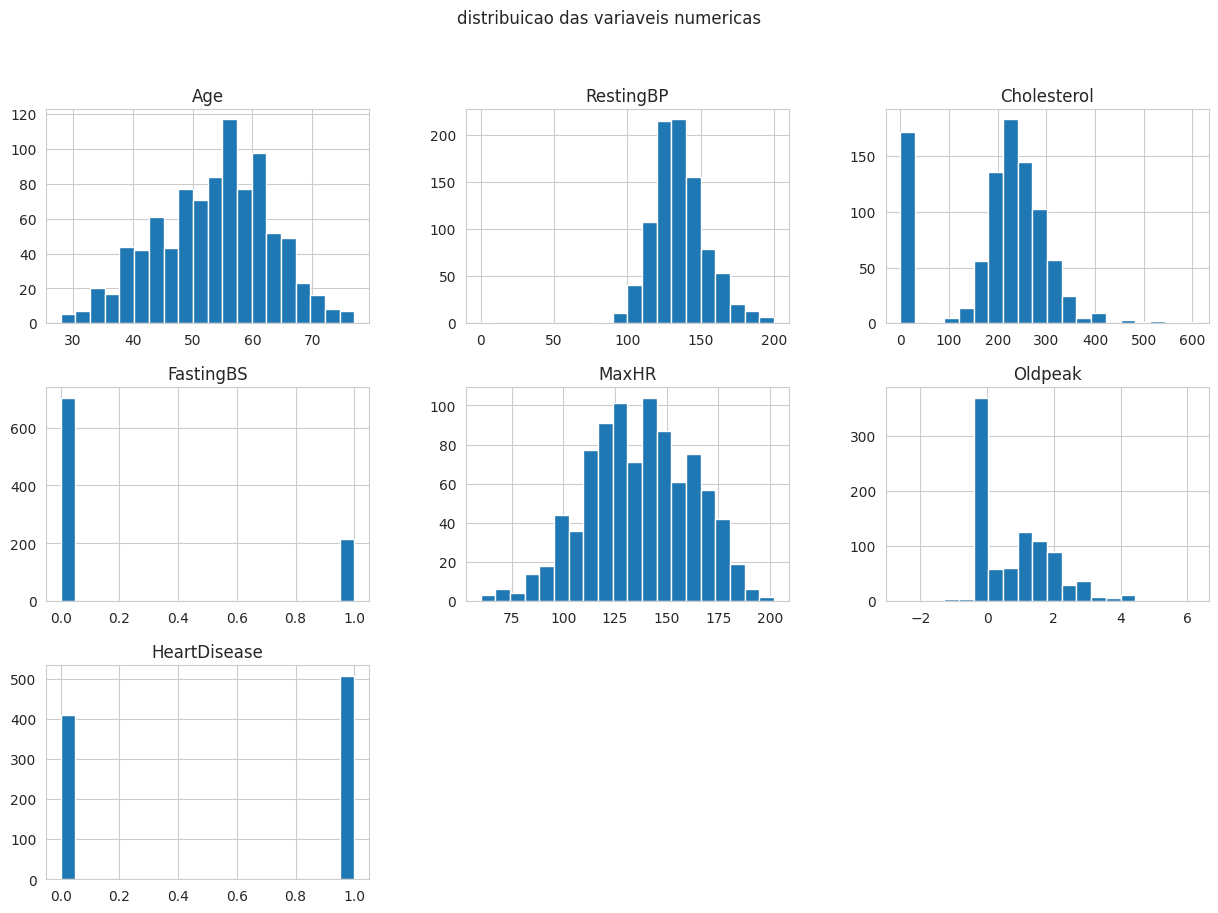

^:seleciona e armazena os nomes das colunas que sao numericas #8
^:cria um histograma para cada coluna numerica #9 

1.5)- matriz de correlacao [apenas numericas]


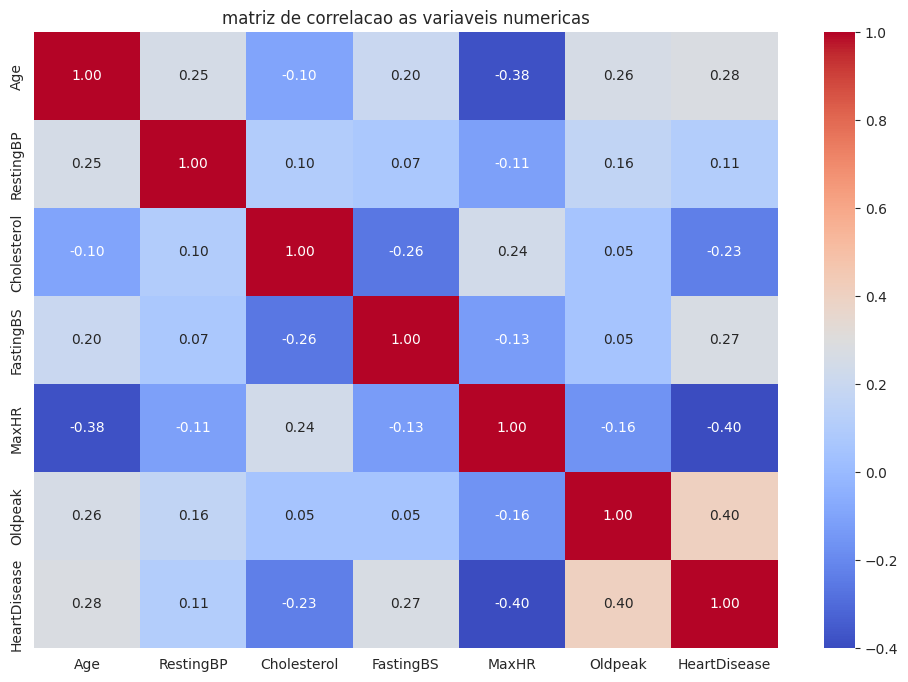

insights: 'MaxHR' [frequencia cardiaca maxima] tem correlacao negativa com a idade. 'Oldpeak' tem correlacao com a presença de doenca.
^:cria uma nova figura para o grafico com tamanho 12x8 #11
^:calcula a matriz de correlacao entre as colunas numericas #12
^:cria um mapa de calor (heatmap) da matriz de correlacao, mostrando os valores numericos #13 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
2)- separacao de features e alvo
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
X [features]: (918, 11)
Y [alvo]: (918,)
^: cria um dataframe 'x' com todas as colunas, exceto a coluna alvo 'heartdisease' #14
^: cria uma serie 'y' contendo apenas a coluna alvo 'heartdisease' #15
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
3)= divisao estratificada dos dados
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

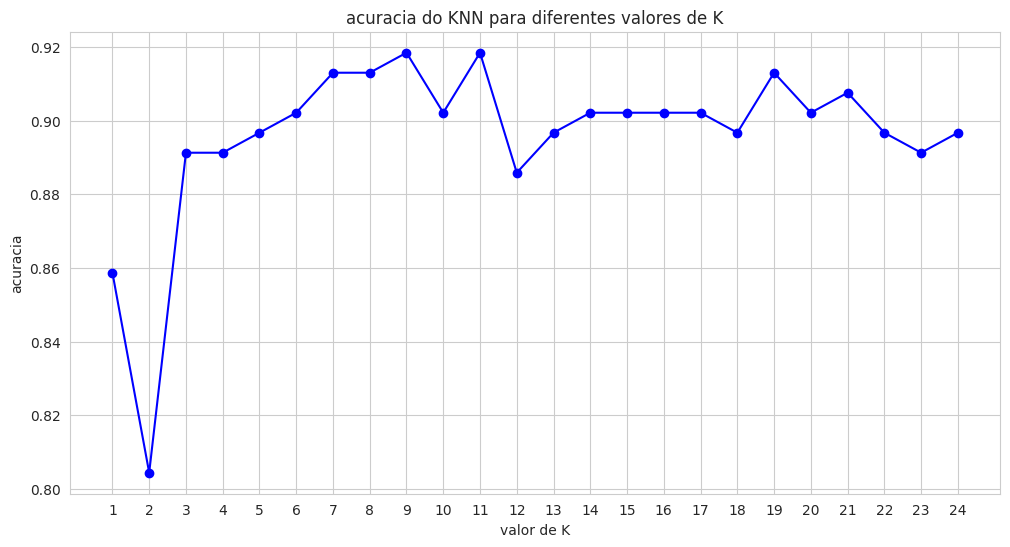

^:cria uma nova figura para o grafico #35
^:cria um grafico de linha mostrando a acuracia para cada valor de k #36 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
5)= otimizacao do knn com gridsearchcv e validacao cruzada
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Fitting 5 folds for each of 180 candidates, totalling 900 fits
^:cria um pipeline para o knn, a ser usado com o gridsearch #37
^:cria um dicionario com os hiperparametros a serem testados pelo gridsearch #38
^:cria um objeto gridsearch que testara todas as combinacoes de hiperparametros com validacao cruzada #39
^:executa a busca por hiperparametros usando os dados de treino #40 

melhores parametros para KNN encontrados: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
melhor pontuacao de Recall [validacao cruzada]: 0.9064
relatorio de classi

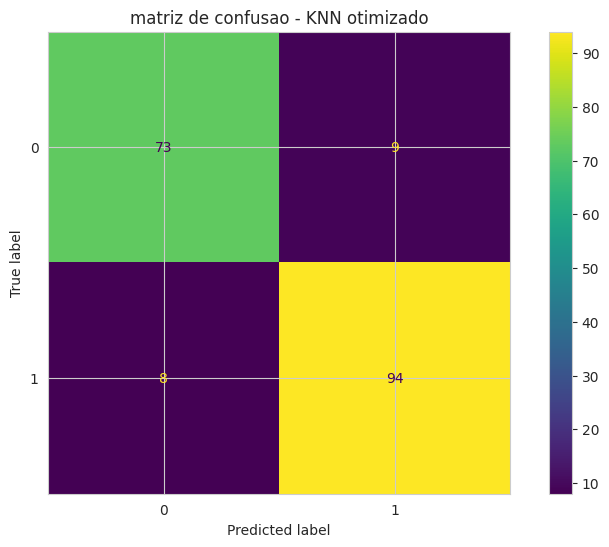

# armazena o melhor modelo (pipeline completo) encontrado pelo gridsearch #41
# usa o melhor modelo para fazer previsoes nos dados de validacao #42
# mostra um relatorio completo com varias metricas de classificacao (precisao, recall, f1-score) #43
# cria e exibe uma matriz de confusao visual a partir do modelo treinado #44 
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
6)= comparacao com outros modelos [baseline]
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
modelo de regressao logistica
relatorio de classificacao para regressao logistica
                precision    recall  f1-score   support

sem doenca [0]       0.91      0.83      0.87        82
com doenca [1]       0.87      0.93      0.90       102

      accuracy                           0.89       184
     macro avg       0.89      0.88      0.88       184
  weighted avg       0.89      0.89     

In [ ]:
#1
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  Caderno TP1 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#Objetivo: Este projeto propõe uma experiência prática em Inteligência Artificial (IA) e Machine Learning (ML), permitindo a aplicação de conceitos e técnicas adquiridos em disciplinas regulares num contexto de dados reais.

#Carregamento de Dados: Identifique as características (features) e o alvo (target) nos conjuntos de dados, compreendendo sua estrutura e importância.
#Divisão de Dados: Separe os dados em conjuntos de treino e validação, essenciais para o desenvolvimento e avaliação de modelos de ML. Você irá dividir 80% dos dados para treino e o restante para validação.
#Transformação de Dados: Utilize transformadores do Scikit-Learn para ajustar e padronizar as variáveis dos dados.
#Modelagem de K-Nearest Neighbors (KNN): Implemente e ajuste o algoritmo KNN, compreendendo suas nuances e aplicabilidade.
#Avaliação de Modelos: Avalie a qualidade do modelo desenvolvido usando acurácia
#Análise de Parâmetros: Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ferramentas do Scikit-Learn [pre-processamento, pipelines e modelagem]
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#modelos a serem testados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier # Importando um modelo mais poderoso para comparação
from sklearn.linear_model import LogisticRegression # Um ótimo modelo de baseline

#metricas de avaliacao
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    recall_score
)

#configuraçoes para os graficos visuais
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

#============================================================ imports ========================================================================

#Dataset:
print("Previsao de doenças cardiacas")

#Age: idade do paciente em anos.
#Sex: sexo do paciente [M = Masculino, F = Feminino]
#ChestPainType: tipo de dor no peito
#ATA: angina atipica
#NAP: dor nao anginosa
#ASY: assintomatico
#TA: angina tipica
#RestingBP: pressao arterial em repouso [em mm Hg]
#Cholesterol: nivel de colesterol serico [em mg/dl].
#FastingBS: glicemia em jejum (nivel de acucar no sangue em jejum) [1: se > 120 mg/dl 0: se <= 120 mg/dl]
#RestingECG: resultados do eletrocardiograma em repouso.
#Normal: normal
#ST: anormalidade da onda ST-T
#LVH: hipertrofia ventricular esquerda provavel ou definitiva
#MaxHR: frequencia cardiaca maxima atingida durante um teste de esforço.
#ExerciseAngina: angina [dor no peito] induzida por exercicio [Y = Sim, N = Não].
#Oldpeak: depressao do segmento ST induzida pelo exercicio em relacao ao repouso.
#ST_Slope: a inclinacao do segmento ST no pico do exercicio [Up = Ascendente, Flat = Plano, Down = Descendente].


#Esse dataset contem informacoes clinicas e demograficas de pacientes.

url ="https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/heart.csv"

print("Resumo: Objetivo desse conjunto de dados e usar as caracteristicas [features] de um paciente para treinar um modelo que possa prever se ele tem ou nao uma doença cardiaca")
print("Pra isso o codigo utiliza o algoritmo K-Nearest Neighbors [KNN] e executa um processo para encontrar o melhor valor para o parametro K, a fim de maximizar a precisao [acuracia] do modelo.")
print("E um problema de classificacao binaria, onde o resultado e 'Sim' [possui a doença] ou 'Não' [nao possui a doença].")

#Sobre o K-Nearest Neighbors
#A ideia do KNN pode ser resumida como quem sao seus vizinhos e eu direi sobre voce [aprendizado supervisionado.]
#Muito usado para tarefas de Classificacao [prever uma categoria, como 'tem doenca' ou 'nao tem'] e Regressao [prever um numero continuo, como o preco de um equipamento].
#Ele classifica um novo dado com base na categoria da maioria dos seus vizinhos mais proximos em um conjunto de dados ja conhecido.

df = pd.read_csv(url)#usa o pandas para ler o arquivo csv da url e o armazena em um dataframe chamado 'df'


print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("1)- analise exploratoria de dados")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

print("visualizacao inicial e estrutura dos dados")
print("inicio do dataset=")
print(df.head())

print("informacoes gerais do dataset=")
df.info()

print("descritivas das colunas numericas=")
print(df.describe())

print(f"verificando valores nulos= {df.isnull().sum().sum()} nulos encontrados.")
print(f"verificando linhas duplicadas= {df.duplicated().sum()} duplicadas encontradas.")
print("remover poucas duplicadas")
df = df.drop_duplicates().reset_index(drop=True)
print(f"formato do DataFrame apos remover duplicadas: {df.shape}")

print("===============================================================================================================")



print("1.2)- analise da variavel alvo [HeartDisease]")
###############################################################################

plt.figure(figsize=(6, 4)) #1
sns.countplot(x='HeartDisease', data=df)  #2
plt.title('distribuicao da variavel alvo [0]=sem doenca, [1]=com doenca)')
plt.show()
print("^:cria uma nova figura para o grafico com tamanho 6x4 #1")
print("^:cria um grafico de contagem para a coluna 'heartdisease' #2 \n")

print(df['HeartDisease'].value_counts(normalize=True)) #3
print("^:calcula e mostra a proporcao de cada valor na coluna 'heartdisease' #3")
print("conclusao:as classes sao relativamente balanceadas [~55% vs 45%].")
################################################################################
print("1.3)- analise das variaveis categoricas")


categorical_features_viz = df.select_dtypes(include=['object']).columns #4
for col in categorical_features_viz:  #5
    plt.figure(figsize=(10, 5)) #6
    sns.countplot(x=col, data=df, hue='HeartDisease', order=df[col].value_counts().index) #7
    plt.title(f'distribuicao de "{col}" por doença cardiaca')
    plt.xticks(rotation=45)
    plt.show()

print("^:seleciona e armazena os nomes das colunas que sao do tipo 'object' [texto]  #4 ")
print("^:inicia um loop que passara por cada nome de coluna categorica #5 ")
print("^:cria uma nova figura para cada grafico do loop #6")
print("^:cria um grafico de contagem para a coluna atual, separando por 'heartdisease' e ordenando pela frequencia #7 \n")
################################################################################

print("1.4)- analise das variaveis numericas")
numeric_features_viz = df.select_dtypes(include=['int64', 'float64']).columns #8
df[numeric_features_viz].hist(bins=20, figsize=(15, 10)) #9
plt.suptitle("distribuicao das variaveis numericas")
plt.show()

print("^:seleciona e armazena os nomes das colunas que sao numericas #8")
print("^:cria um histograma para cada coluna numerica #9 \n")


print("1.5)- matriz de correlacao [apenas numericas]")
plt.figure(figsize=(12, 8)) #10
corr_matrix = df[numeric_features_viz].corr() #11
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") #13
plt.title("matriz de correlacao as variaveis numericas")
plt.show()
print("insights: 'MaxHR' [frequencia cardiaca maxima] tem correlacao negativa com a idade. 'Oldpeak' tem correlacao com a presença de doenca.")

print("^:cria uma nova figura para o grafico com tamanho 12x8 #11")
print("^:calcula a matriz de correlacao entre as colunas numericas #12")
print("^:cria um mapa de calor (heatmap) da matriz de correlacao, mostrando os valores numericos #13 \n")



#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#2= definicao de features [X] e alvo [Y]
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("2)- separacao de features e alvo")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")



X = df.drop(columns=["HeartDisease"]) #14
y = df["HeartDisease"]                #15
print(f"X [features]: {X.shape}")
print(f"Y [alvo]: {y.shape}")

print("^: cria um dataframe 'x' com todas as colunas, exceto a coluna alvo 'heartdisease' #14")
print("^: cria uma serie 'y' contendo apenas a coluna alvo 'heartdisease' #15")


#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#3= divisao estratificada dos dados
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("3)= divisao estratificada dos dados")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #16
print(f"tamanho do treino: {len(X_train)} amostras") #17
print(f"tamanho da validacao: {len(X_val)} amostras") #18
print(f"proporcao da classe 1 no treino: {y_train.mean():.2f}") #19
print(f"proporcao da classe 1 na validação: {y_val.mean():.2f}") #20
print("as proporcoes sao quase identicas por causa do 'stratify=y'.\n")

print("^:divide os dados 'x' e 'y' em conjuntos de treino e validacao, mantendo a proporcao das classes #16")
print("^:mostra o numero de amostras no conjunto de treino #17")
print("^:mostra o numero de amostras no conjunto de validacao #18")
print("^:calcula a proporcao da classe positiva (1) nos dados de treino #19")
print("^:calcula a proporcao da classe positiva (1) nos dados de validacao #20")

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#4= construcao do pipeline de pre-processamento
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("4)- criacao do pipeline de preprocessamento")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns #21
categorical_features = X.select_dtypes(include=['object']).columns #22

preprocessor = ColumnTransformer(       #23
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("^:identifica e armazena os nomes das colunas numericas do conjunto de treino #21")
print("^:identifica e armazena os nomes das colunas de texto do conjunto de treino #22")
print("^:cria um objeto que ira aplicar transformacoes especificas a grupos de colunas #23 \n")


#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#4.5)= analise de parametros (variacao de k e acuracia)
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("4.5)- analise de parametros (variacao de k e acuracia)")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#definindo a lista de valores de K a serem testados
k_values = range(1, 25) #24
accuracies = []

print("iniciando a analise de variação de K x Acuracia \n")

#iterando sobre os valores de K
for k in k_values:  #25
    #criando um classificador KNN especifico para este valor de K
    knn_para_rubrica = KNeighborsClassifier(n_neighbors=k)  #26

    #criando um pipeline completo para este modelo especifico, usar o mesmo 'preprocessor'
    pipeline_para_rubrica = Pipeline(steps=[    #27
        ('preprocessor', preprocessor),
        ('classifier', knn_para_rubrica)
    ])

    #treinando o modelo com os dados de treino
    pipeline_para_rubrica.fit(X_train, y_train) #28

    #fazendo predicoes nos dados de validacao
    y_pred_rubrica = pipeline_para_rubrica.predict(X_val) #29
    #calculando a acuracia
    acc = accuracy_score(y_val, y_pred_rubrica) #30
    accuracies.append(acc) #31

    #exibindo a acuracia para cada K
    print(f"acuracia para K={k}: {acc:.4f}")

print("^:cria uma lista de numeros de 1 a 30 para testar como valor de k #24")
print("^:inicia um loop que passara por cada numero na lista 'k_values' #25")
print("^:cria uma instancia do classificador knn usando o valor atual de k #26")
print("^:cria um pipeline que primeiro aplica o pre-processamento e depois o classificador knn #27")
print("^:treina o pipeline completo usando os dados de treino #28")
print("^:usa o pipeline treinado para fazer previsoes nos dados de validacao #29")
print("^:calcula a acuracia comparando os valores reais ('y_val') com as previsoes #30")
print("^:adiciona a acuracia calculada a lista 'accuracies' #31 \n")


#encontrando o melhor valor de K com base na acuracia
best_k_acuracia = k_values[np.argmax(accuracies)] #32
best_acuracia = max(accuracies) #33
print(f"melhor K [c/ base na acuracia da validacao simples]= {best_k_acuracia} com acuracia de {best_acuracia:.4f}") #34

print("^:encontra o valor de k que resultou na maior acuracia #32")
print("^:encontra o valor maximo de acuracia na lista #33")
print("^:mostra o melhor k e sua respectiva acuracia #34 \n")


#mostrando os resultados em um grafico
plt.figure(figsize=(12, 6)) #35
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b') #36
plt.title('acuracia do KNN para diferentes valores de K')
plt.xlabel('valor de K') # define o rotulo do eixo x
plt.ylabel('acuracia') # define o rotulo do eixo y
plt.xticks(k_values)  # define as marcas no eixo x para serem todos os valores de k
plt.grid(True) # adiciona uma grade ao grafico
plt.show()

print("^:cria uma nova figura para o grafico #35")
print("^:cria um grafico de linha mostrando a acuracia para cada valor de k #36 \n")

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#5)= otimizacao de hiperparametros do knn com gridsearchcv
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("5)= otimizacao do knn com gridsearchcv e validacao cruzada")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#foi construido o pipeline final c/ pre-processador e o classificador KNN
knn_pipeline = Pipeline(steps=[       #37
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

#foi definido os parametros que o GridSearchCV vai testar
param_grid_knn = {                  #38
    'classifier__n_neighbors': range(1, 31),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}
#foi definido o 'recall' como a metrica principal de otimizacao, necessario identificar certo os pacientes doentes [minimizar falsos negativos].
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='recall', verbose=1, n_jobs=-1) #39
grid_search_knn.fit(X_train, y_train) #40

print("^:cria um pipeline para o knn, a ser usado com o gridsearch #37")
print("^:cria um dicionario com os hiperparametros a serem testados pelo gridsearch #38")
print("^:cria um objeto gridsearch que testara todas as combinacoes de hiperparametros com validacao cruzada #39")
print("^:executa a busca por hiperparametros usando os dados de treino #40 \n")

print(f"melhores parametros para KNN encontrados: {grid_search_knn.best_params_}")
print(f"melhor pontuacao de Recall [validacao cruzada]: {grid_search_knn.best_score_:.4f}")

#avaliacao do melhor modelo KNN no conjunto de validacao
best_knn = grid_search_knn.best_estimator_  #41
y_pred_knn = best_knn.predict(X_val) #42
print("relatorio de classificacao final para o KNN otimizado")
print(classification_report(y_val, y_pred_knn, target_names=["sem doenca [0]", "com doença [1]"])) #43

ConfusionMatrixDisplay.from_estimator(best_knn, X_val, y_val, cmap='viridis') #44
plt.title("matriz de confusao - KNN otimizado")
plt.show()

print("# armazena o melhor modelo (pipeline completo) encontrado pelo gridsearch #41")
print("# usa o melhor modelo para fazer previsoes nos dados de validacao #42")
print("# mostra um relatorio completo com varias metricas de classificacao (precisao, recall, f1-score) #43")


print("# cria e exibe uma matriz de confusao visual a partir do modelo treinado #44 ")


#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#6)= comparacao com outros modelos
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("6)= comparacao com outros modelos [baseline]")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#modelo 2: regressao logistica
print("modelo de regressao logistica")
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, max_iter=1000))]) #45
lr_pipeline.fit(X_train, y_train)         #46
y_pred_lr = lr_pipeline.predict(X_val)    #47
print("relatorio de classificacao para regressao logistica")
print(classification_report(y_val, y_pred_lr, target_names=["sem doenca [0]", "com doenca [1]"])) #48


print("^:cria um pipeline para o modelo de regressao logistica #45")
print("^:treina o pipeline de regressao logistica #46")
print("^:faz previsoes com o modelo de regressao logistica #47")
print("^:mostra o relatorio de classificacao para o modelo de regressao logistica #48 \n")


#modelo 3: random forest
print("modelo de random forest")
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]) #49
rf_pipeline.fit(X_train, y_train) #50
y_pred_rf = rf_pipeline.predict(X_val) #51
print("relatorio de classificacao para random forest")
print(classification_report(y_val, y_pred_rf, target_names=["Sem Doença [0]", "Com Doença [1]"])) #52

print("^:cria um pipeline para o modelo de random forest #49")
print("^:treina o pipeline de random forest #50")
print("^:faz previsoes com o modelo de random forest #51")
print("^:mostra o relatorio de classificacao para o modelo random forest 52 \n")



# =================================================================================
#7- analise
# =================================================================================
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("7)= conclusoes")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

recall_knn = recall_score(y_val, y_pred_knn)#53        # calcula especificamente a metrica recall para o modelo knn
recall_lr = recall_score(y_val, y_pred_lr)  #54         # calcula especificamente a metrica recall para o modelo de regressao logistica
recall_rf = recall_score(y_val, y_pred_rf)  #55        # calcula especificamente a metrica recall para o modelo random forest

print("calcula metrica recall modelo knn #53, regressao logistica #54, random forest #55")

print("comparativo de performance [Recall da Classe 1]")
print(f"recall do KNN otimizado: {recall_knn:.4f}")
print(f"recall da regressao logistica: {recall_lr:.4f}")
print(f"recall do random forest: {recall_rf:.4f}")

#logica para determinar o melhor modelo
models_performance = {          #56
    "KNN Otimizado": recall_knn,
    "Regressão Logística": recall_lr,
    "Random Forest": recall_rf
}
best_model_name = max(models_performance, key=models_performance.get) #57

print("^:cria um dicionario para armazenar o nome e o recall de cada modelo  #56")
print("^:encontra o nome do modelo com o maior valor de recall no dicionario #57 ")

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  Caderno TP2 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


colunas True.csv: ['title', 'text', 'subject', 'date']
colunas Fake.csv: ['title', 'text', 'subject', 'date']
valores null no text: 0
distribuicao classes: target
0    0.501693
1    0.498307
Name: proportion, dtype: float64
variacao explicada pelo SVD: 0.2419


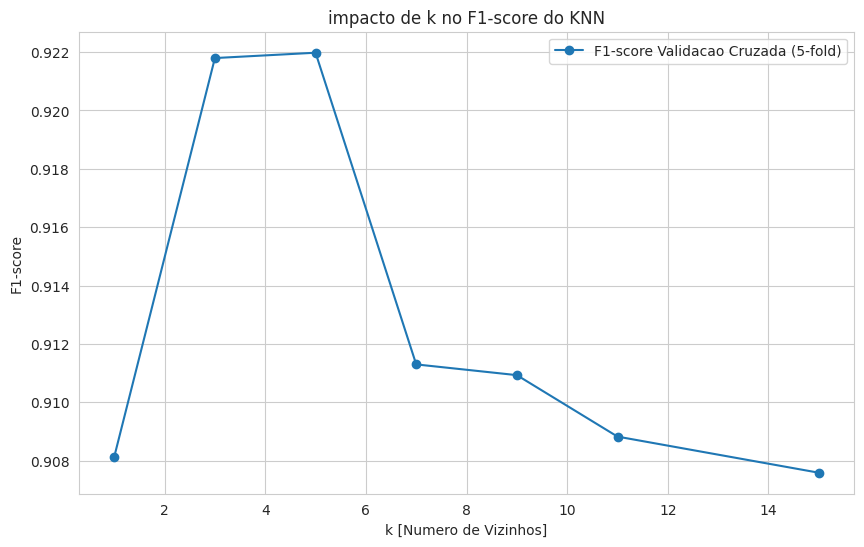

melhor k= 5
melhor peso = distance
melhor F1-score [validacao cruzada]= 0.9256

 relatorio de classificacao:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1906
           1       0.88      0.94      0.91      1887

    accuracy                           0.91      3793
   macro avg       0.91      0.91      0.91      3793
weighted avg       0.91      0.91      0.91      3793



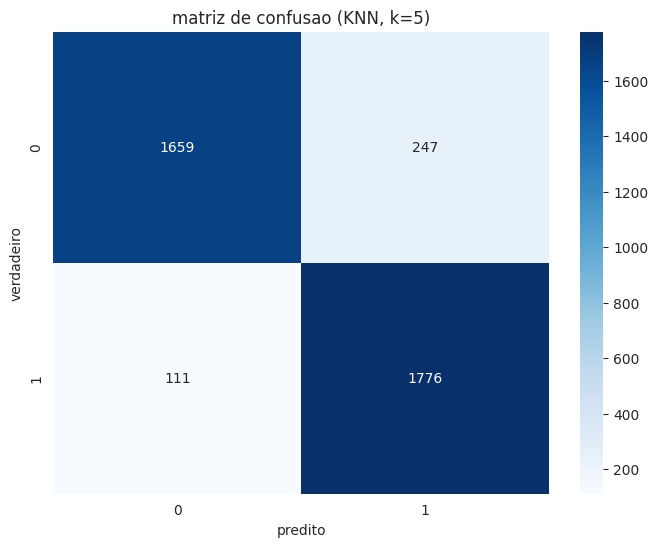

F1-score medio (validacao cruzada): 0.9256
acuracia media (validacao cruzada): 0.9242
sensibilidade [recall classe positiva]: 0.9412
especificidade: 0.8704


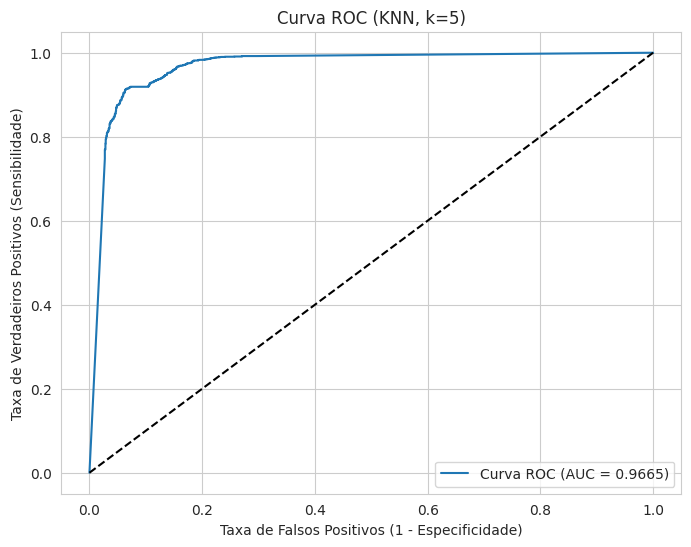

In [ ]:
#2
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  Caderno TP2 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#Objetivo: Este projeto tem como objetivo proporcionar aos alunos experiência prática em técnicas de Processamento de Linguagem Natural (NLP) e Machine Learning, aplicadas a conjuntos de dados textuais.

#Descrição das Atividades:

#Criação das features: Computar o Term Frequency-Inverse Document Frequency (TF-IDF) para representar a importância das palavras em um conjunto de documentos.
#Modelagem de K-Nearest Neighbors (KNN): Criar modelos simples de classificação utilizando a base de dados codificada por TF-IDF.
#Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).
#Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.
#Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.
#Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.

#1
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#baixar itens do nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

#funcao de preprocessamento de texto
def preprocessamento_texto(text):
    """Pré-processa o texto para remover ruídos e padronizar."""
    if not isinstance(text, str):
        return ""
    #converter minusculas
    text = text.lower()
    #remover pontuacoes e numeros
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    #tokenizacao
    tokens = word_tokenize(text)
    #remover stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    #lematizacao
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

#carregar os datasets sem cabecalho e atribuir nomes de colunas
true_url = 'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/True.csv'
fake_url = 'https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/Fake.csv'

try:
    df_true = pd.read_csv(true_url, header=None, names=['title', 'text', 'subject', 'date'])
    df_fake = pd.read_csv(fake_url, header=None, names=['title', 'text', 'subject', 'date'])
except Exception as e:
    print(f"erro ao carregar datasets: {e}")
    raise

#verificar colunas
print("colunas True.csv:", df_true.columns.tolist())
print("colunas Fake.csv:", df_fake.columns.tolist())

#adicionar coluna target
df_true['target'] = 1  #verdadeiro
df_fake['target'] = 0  #falso

#combinar os datasets
df = pd.concat([df_true, df_fake], ignore_index=True)

#verificar valores nulos na coluna text
print("valores null no text:", df['text'].isnull().sum())

#remover ou substituir valores nulos
df['text'] = df['text'].fillna('')  # substituir NAN por string vazia

print("distribuicao classes:", df['target'].value_counts(normalize=True))

#aplicar pre-processamento na coluna text
df['cleaned_text'] = df['text'].apply(preprocessamento_texto)

#calcular tf-idf
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['target']

# melhorar o codigo usando o SMOTE para balanceamento
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#reduzir dimensionalidade com TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
X_resampled = svd.fit_transform(X_resampled)
print(f"variacao explicada pelo SVD: {np.sum(svd.explained_variance_ratio_):.4f}")

#dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#explorar valores de k com GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['cosine']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

#plotar resultados
results = pd.DataFrame(grid_search.cv_results_)
k_values = param_grid['n_neighbors']
mean_scores = [results[results['param_n_neighbors'] == k]['mean_test_score'].mean() for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, label='F1-score Validacao Cruzada (5-fold)', marker='o')
plt.xlabel('k [Numero de Vizinhos]')
plt.ylabel('F1-score')
plt.title('impacto de k no F1-score do KNN')
plt.legend()
plt.grid(True)
plt.show()

best_k = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']
print(f"melhor k= {best_k}")
print(f"melhor peso = {best_weights}")
print(f"melhor F1-score [validacao cruzada]= {grid_search.best_score_:.4f}")

#treinar modelo com melhor k
knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, metric='cosine')
knn.fit(X_train, y_train)

#previsoes
y_pred = knn.predict(X_test)

################################ avaliacao ###################################
print("\n relatorio de classificacao:")
print(classification_report(y_test, y_pred))

#matriz de confusao
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('matriz de confusao (KNN, k={})'.format(best_k))
plt.xlabel('predito')
plt.ylabel('verdadeiro')
plt.show()

#analise da validacao cruzada
cv_f1 = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1').mean()
cv_accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"F1-score medio (validacao cruzada): {cv_f1:.4f}")
print(f"acuracia media (validacao cruzada): {cv_accuracy:.4f}")

#sensibilidade e especificidade a partir da matriz de confusao
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
sensibilidade = TP / (TP + FN) if (TP + FN) > 0 else 0
especificidade = TN / (TN + FP) if (TN + FP) > 0 else 0
print(f"sensibilidade [recall classe positiva]: {sensibilidade:.4f}")
print(f"especificidade: {especificidade:.4f}")

#calcular e plotar a Curva ROC
#obter probabilidades para a classe positiva
y_prob = knn.predict_proba(X_test)[:, 1]

#calcular curva ROC e AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

#plotar a ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC (KNN, k={})'.format(best_k))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


print("Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.")

print("Relatório Prático")
print("Alta sensibilidade: O modelo tem baixo risco de deixar notícias verdadeiras passarem despercebidas (baixo falso negativo).")
print("Boa especificidade: O classificador se tornou efetivo ao barrar fake news, reduzindo falsos positivos, o risco de considerar uma notícia falsa como verdadeira é baixo.")
print("Isso indica que no case solicitado o modelo consegue detectar corretamente a maioria dos casos, se tornando um bom algoritmo para combate inicial à desinformação.\n")

print("O modelo de classificação binária para detecção de notícias falsas e verdadeiras:")
print("Acurácia: 92%")
print("F1-Score: 0.9256")
print("AUC (Área sob a Curva ROC): 0.9665 \n")

print("Sensibilidade:  94%: O modelo identificou bem a maioridade das notícias verdadeiras apresentando baixo falsos negativos e reduzindo o risco de censura de informação legítima.")
print("Especificidade: 87%: Isso indica que a maioria das fake news foram corretamente barradas, sendo uma boa ferramenta contra desinformação.")
print("A AUC de 0.9665 confirma que o classificador teve um bom desempenho discriminativo e equilibrado entre os trade-offs entre classes \n")

print("Notícias Falsas")
print("Precisão: 94%")
print("Recall: 87%")
print("F1-Score: 90% \n")

print("Notícias Verdadeiras")
print("Precisão: 88%")
print("Recall: 94%")
print("F1-Score: 91% \n")

print("Verdadeiro Negativo: 1659")
print("Verdadeiro Positivo: 1776")
print("Falso Positivo: 247")
print("Falso Negativo: 111")





xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  Caderno TP3 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
algumas linhas dataset:
        0       1       2       3       4       5       6       7       8  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

        9  ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.01

/tmp/ipython-input-2342915019.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


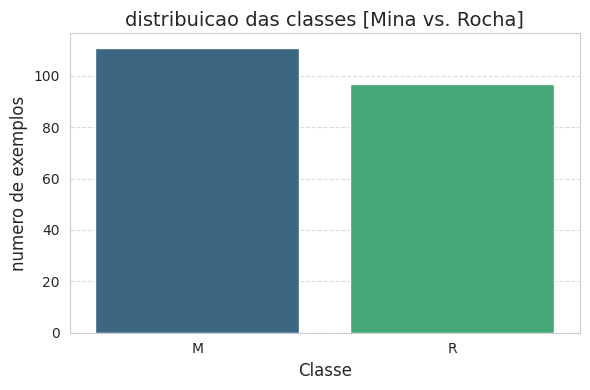

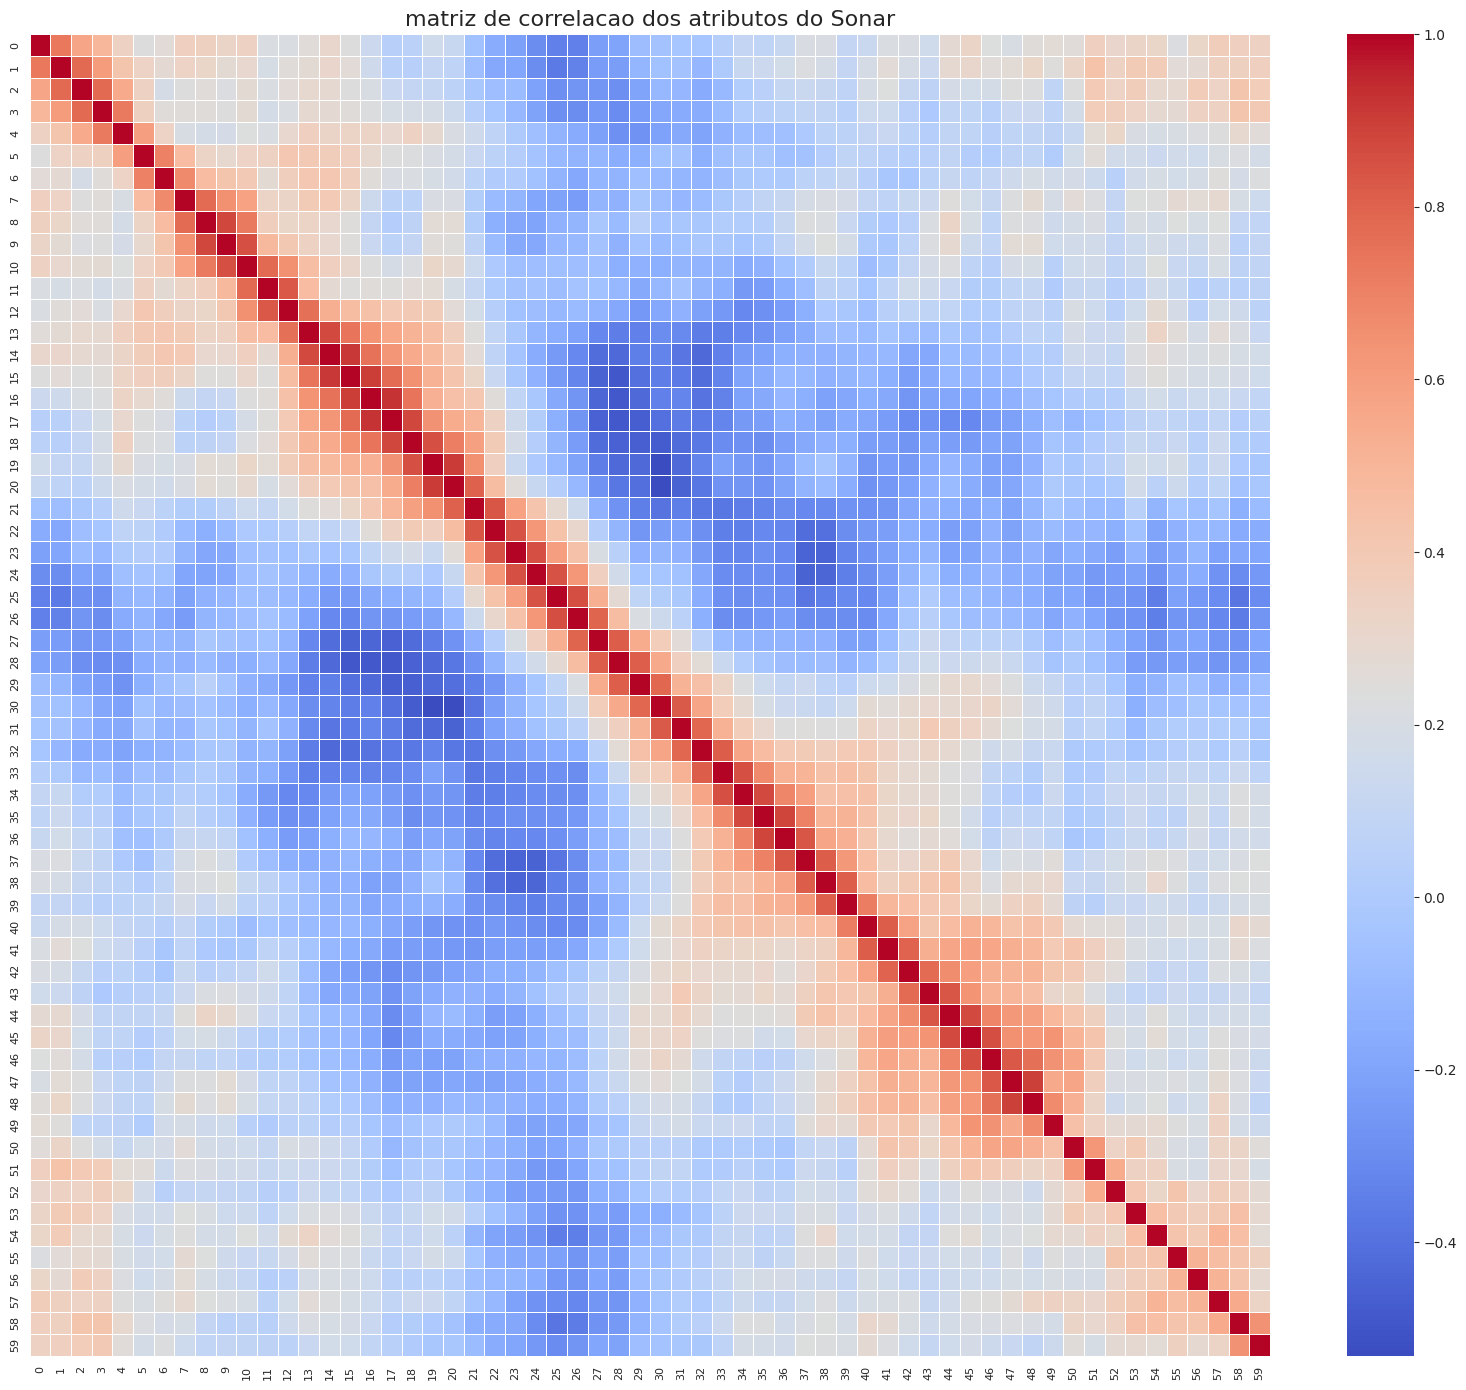

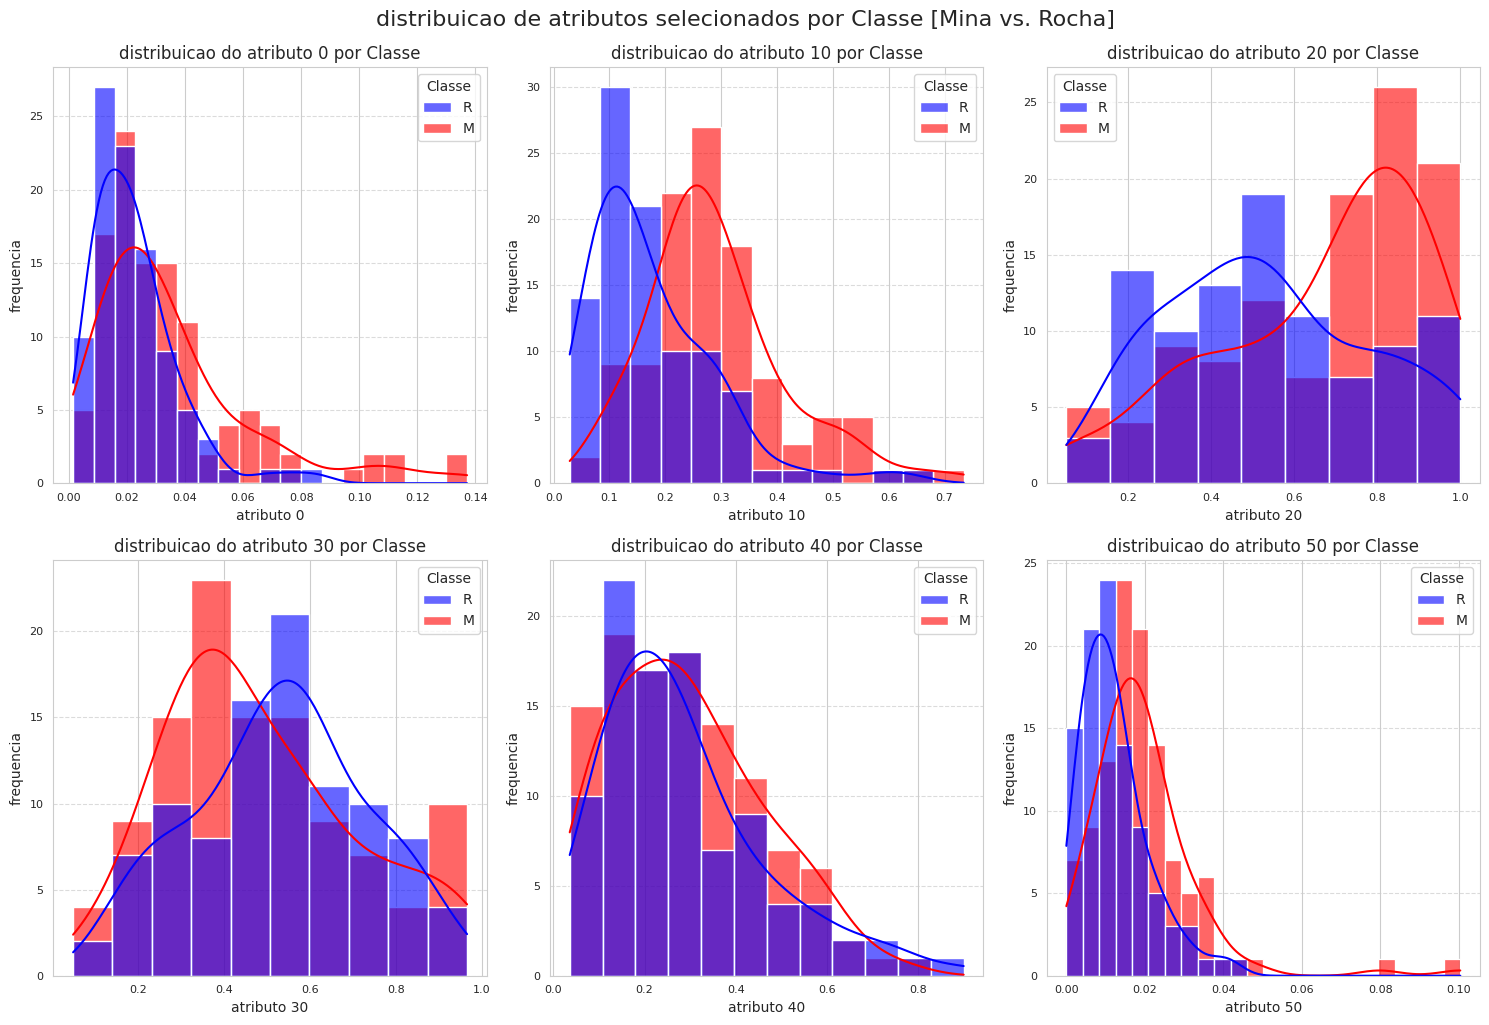

dimensionalidade
(145, 60)


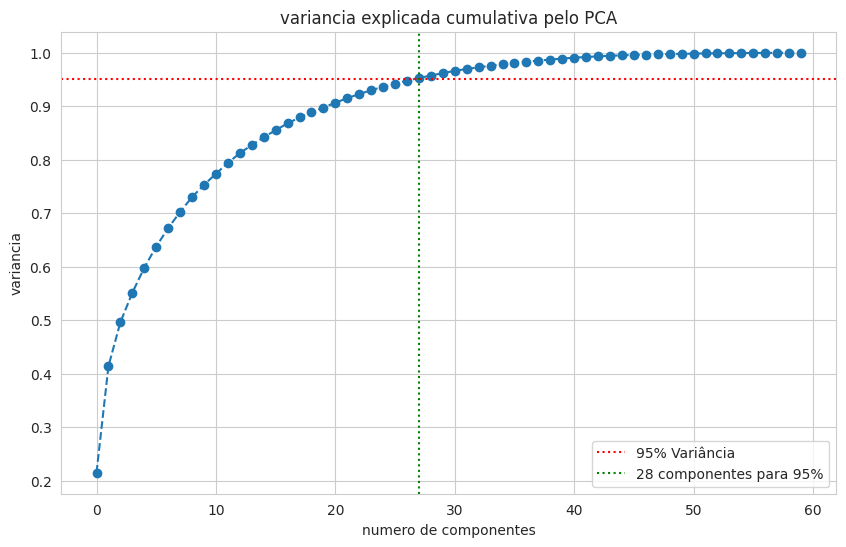

dimensionalidade apos aplicacao do PCA
numero de componentes selecionados para 95% de variancia: 28
variancia total explicada selecionados: 0.9527
shape dos dados de treino: (145, 28)
treinando modelo de arvore de decisao
avaliando o modelo
acuracia do modelo: 0.7937

relatorio de classificao:
              precision    recall  f1-score   support

    Mina (0)       0.78      0.85      0.82        34
   Rocha (1)       0.81      0.72      0.76        29

    accuracy                           0.79        63
   macro avg       0.80      0.79      0.79        63
weighted avg       0.79      0.79      0.79        63

matriz de confusao:
[[29  5]
 [ 8 21]]


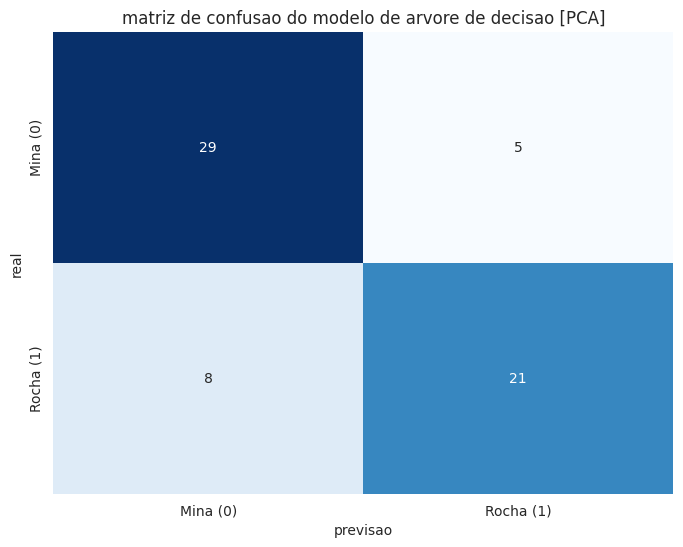

avaliacao do modelo com validacao cruzada
acuracia media [validacao cruzada]: 0.7241 | 0.0755
acuracias por fold: [0.79310345 0.72413793 0.5862069  0.79310345 0.72413793]
busca hiperparametrica com GridSearchCV
melhores hiperparametros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
acuracia media do melhor modelo [validação cruzada]: 0.7448
acuracia no conjunto de teste com o modelo otimizado: 0.7937

relatorio de classificacao [Modelo Otimizado]:
              precision    recall  f1-score   support

    Mina (0)       0.80      0.82      0.81        34
   Rocha (1)       0.79      0.76      0.77        29

    accuracy                           0.79        63
   macro avg       0.79      0.79      0.79        63
weighted avg       0.79      0.79      0.79        63



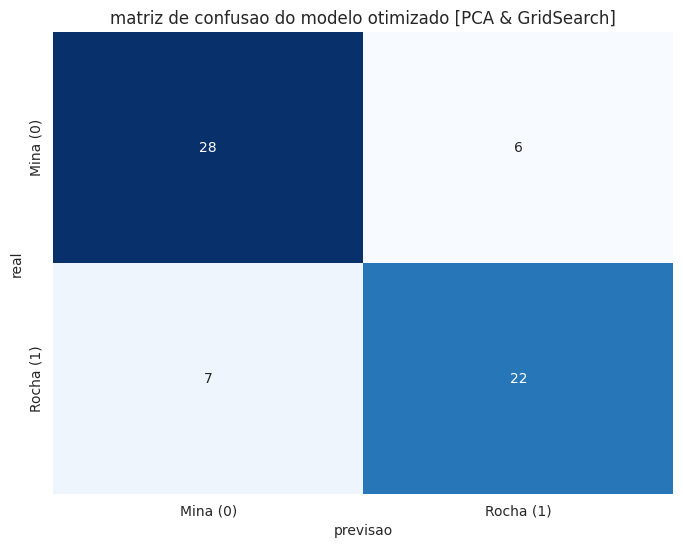

acuracia do modelo baseline [sem/PCA, sem/GridSearch]: 0.6190
acuracia media baseline [validacao cruzada]: 0.6138 | 0.0703
poda de arvore de decisao
otimizado max_depth, min_samples_split e min_samples_leaf.
acuracia do modelo com poda explicita[max_depth=5]: 0.7937
metricas de avaliacao
precisao : 0.7934
recall : 0.7937
f1-score : 0.7933
sensibilidade [recall da classe (Rocha)]: 0.7586
especificidade [recall da classe (Mina)]: 0.8235
curva ROC


<Figure size 800x600 with 0 Axes>

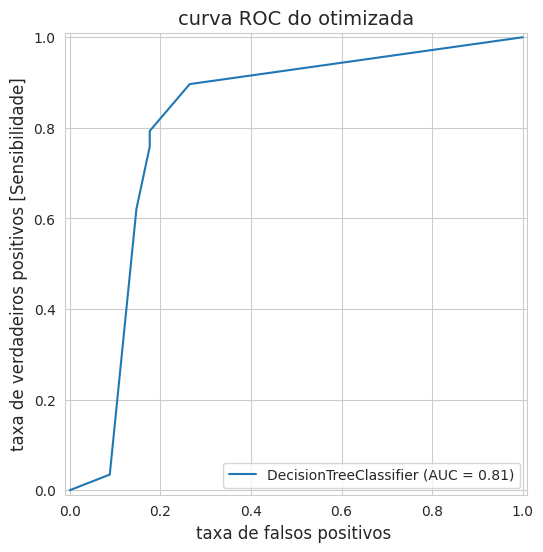

poda de arvore de decisao com Custo-Complexidade (CCP)


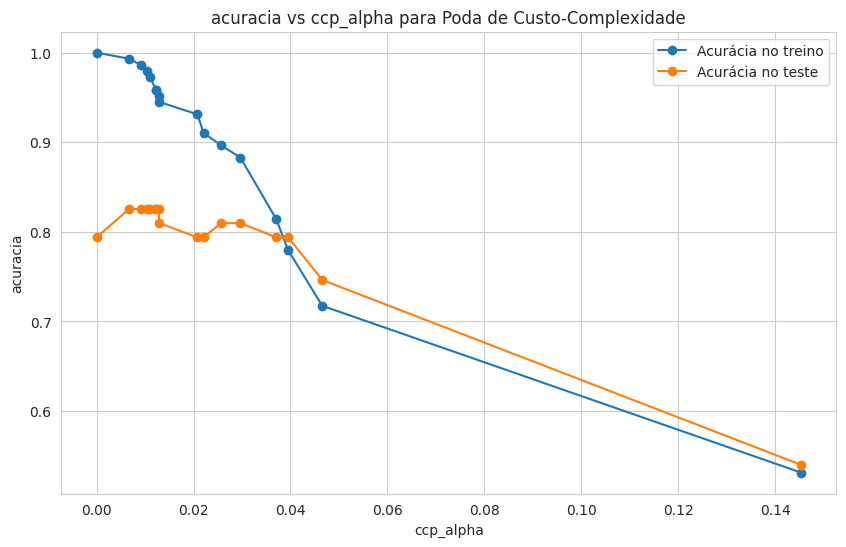

acuracia do modelo com poda CCP (ccp_alpha=0.0068): 0.8254
avaliacao do modelo baseline
metricas de avaliacao - Baseline
Precisão: 0.6176
Recall: 0.6190
F1-Score: 0.6177
AUC: 0.6141
sensibilidade [Recall da classe (Rocha)]: 0.5517
especificidade [Recall da classe (Mina)]: 0.6765


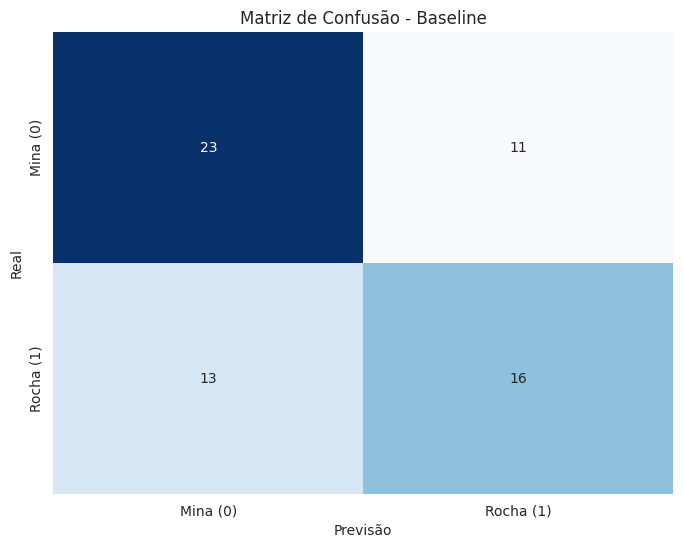

avaliacao do mModelo otimizado
metricas de avaliacao - Otimizado
Precisão: 0.7934
Recall: 0.7937
F1-Score: 0.7933
AUC: 0.7911
sensibilidade [Recall da classe (Rocha)]: 0.7586
especificidade [Recall da classe (Mina)]: 0.8235


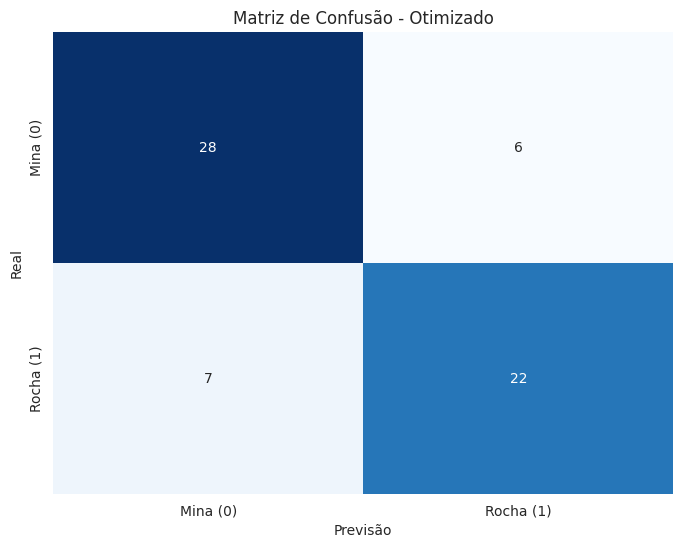

avaliacao do Modelo Podado
metricas de avaliacao - Podado
Precisão: 0.8253
Recall: 0.8254
F1-Score: 0.8251
AUC: 0.8230
sensibilidade [Recall da classe (Rocha)]: 0.7931
especificidade [Recall da classe (Mina)]: 0.8529


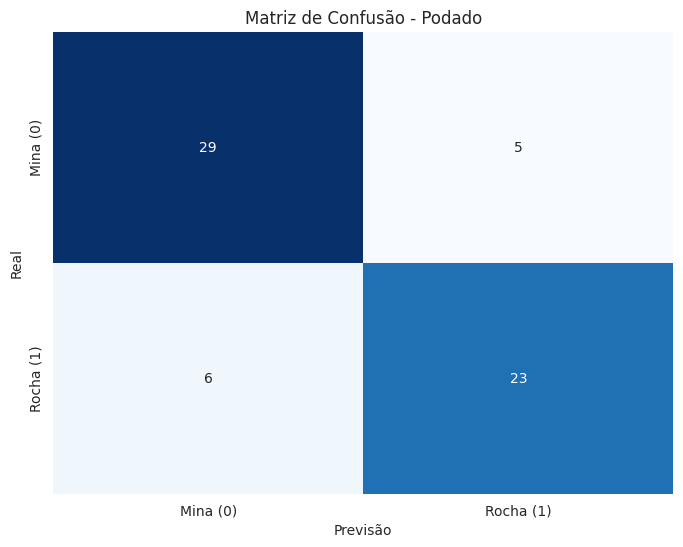

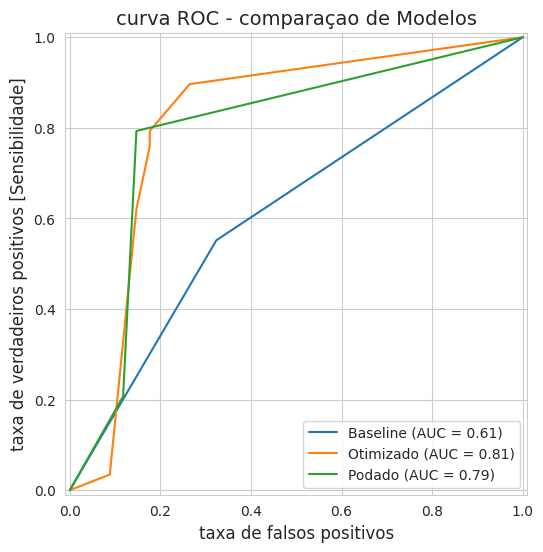

resumo Comparativo de Modelos:
   Modelo  Acurácia  Precisão   Recall  F1-Score      AUC
 Baseline  0.619048  0.617578 0.619048  0.617687 0.614097
Otimizado  0.793651  0.793424 0.793651  0.793336 0.791075
   Podado  0.825397  0.825283 0.825397  0.825130 0.823022


In [ ]:
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  Caderno TP3 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#Objetivo: O projeto tem como objetivo proporcionar aos alunos experiência prática em técnicas avançadas de Machine Learning, focando em classificação binária e redução de dimensionalidade
#Base de dados: Será indicada pelo professor do Projeto de Bloco.
#Descrição das Atividades:
#Criação das features:Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos conjuntos de dados.
#Modelo de ML:  Desenvolver e treinar modelos de árvores de decisão para tarefas de classificação.
#Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.
#Busca Hiperparamétrica: Utilizar GridSearch para otimizar os hiperparâmetros dos modelos.
#Pruning de Árvores de Decisão: Realizar o pruning (poda) em árvores de decisão para prevenir o overfitting e melhorar a generalização do modelo.
#Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.
#Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.
#Ambiente Recomendado: A solução pode ser desenvolvida em qualquer ambiente de sua escolha, embora seja recomendado o uso do Google Colab Notebook. Lembre-se de comentar seu código para facilitar a compreensão da análise e do procedimento adotado.
#Segue abaixo o link do dataset a ser utilizado no TP3. Esse dataset contém 208 exemplos de padrões obtidos ao refletir sinais de sonar em cilindros metálicos e rochas em vários ângulos e em várias direções. Os atributos correspondem aos valores refletidos do sonar e a classe
#(último atributo) identifica se o exemplo é um cilindro metálico (M – miner) ou uma rocha (R – rock). Esse dataset pode ser utilizado para treinar um modelo que identica se um objeto é uma rocha ou uma mina terrestre.000000000000000

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#1)= importacoes
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("1)= importacoes")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#2)= carregamento e analise exploratoria
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("2)= carregamento e analise exploratoria")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#carregar DS
url = "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/sonar_dataset.csv"
df = pd.read_csv(url, header=None) #sem cabeçalho no arquivo

#renomear a ultima coluna p/'Classe'
df.rename(columns={60: 'Classe'}, inplace=True)

#exibir as primeiras linhas do dataset
print("algumas linhas dataset:")
print(df.head())

#exibir informacoes gerais do dataset [numero de linhas, colunas, tipos de dados]
print("informacoes:")
df.info()

#exibir o numero de linhas e colunas
print(f"dimensoes dataset: {df.shape[0]} linhas e {df.shape[1]} colunas")

#contagem de valores nulos
print("contagem nulos p/coluna:")
print(df.isnull().sum().sum()) # Soma de todos os valores nulos
if df.isnull().sum().sum() == 0:
    print("nao tem valores nulos no dataset.")

#exibir estatisticas descritivas para os atributos numericos
print("estatisticas descritivas dos atributos numericos:")
print(df.drop('Classe', axis=1).describe())

#contagem de ocorrencias de cada classe
print("distribuicao da variável 'Classe':")
class_counts = df['Classe'].value_counts()
print(class_counts)
print("\n")

#plotar a distribuicao da variavel 'Classe'
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('distribuicao das classes [Mina vs. Rocha]', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('numero de exemplos', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#calcular a matriz de correlacao
#excluindo a coluna 'Classe' para o calculo da correlacao [categorica]
correlation_matrix = df.drop('Classe', axis=1).corr()

#plotar a matriz de correlacao como um mapa de calor
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('matriz de correlacao dos atributos do Sonar', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

#selecionar alguns atributos para plotar a distribuicao por classe
selected_features = [0, 10, 20, 30, 40, 50] #indices de algumas colunas
plt.figure(figsize=(15, 10))
for i, feature_index in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feature_index, hue='Classe', kde=True, palette={'M': 'red', 'R': 'blue'}, alpha=0.6)
    plt.title(f'distribuicao do atributo {feature_index} por Classe', fontsize=12)
    plt.xlabel(f'atributo {feature_index}', fontsize=10)
    plt.ylabel('frequencia', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.suptitle('distribuicao de atributos selecionados por Classe [Mina vs. Rocha]', y=1.02, fontsize=16)
plt.show()

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#3)= pre-processamento e pca
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("3)= pre-processamento e pca")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#preparar os dados
X = df.drop('Classe', axis=1)
y = df['Classe'].map({'M': 0, 'R': 1}) # Codificar a classe para numérica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#escalar os dados p/ PCA que padroniza os seus dados.
#Calcula a média de todos os valores da coluna.
#Calcula o desvio padrão.
#Para cada valor na coluna, ele subtrai a média e divide pelo desvio padrão.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#Aprendizagem: O StandardScaler analisa o conjunto de dados de treino (X_train) e calcula a média e o desvio padrão de cada coluna.
#Como se o modelo aprendesse as características estatísticas dos seus dados
X_test_scaled = scaler.transform(X_test)
#aplica para transformar os dados de treino. Ele pega cada valor de cada coluna em X_train,
#subtrai a média calculada e divide pelo desvio padrão. O resultado é o conjunto de dados escalado,

#1- Criação das features:Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos conjuntos de dados.
print("dimensionalidade antes do PCA")
print(f"{X_train_scaled.shape}")

#aplicar PCA
#identificar o numero de componentes p/ variancia
pca = PCA() #cria um PCA "vazio" para testar
pca.fit(X_train_scaled) #ajusta o PCA nos dados escalados de treino, calculando os componentes principais.

#plotar a variancia explicada cumulativa para auxiliar na decisao
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('numero de componentes')
plt.ylabel('variancia')
plt.title('variancia explicada cumulativa pelo PCA')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Variância')

n_components_95_var = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
plt.axvline(x=n_components_95_var - 1, color='g', linestyle=':', label=f'{n_components_95_var} componentes para 95%')
plt.legend()
plt.show()
#reaplicar PCA com o numero de componentes que explica 95% da variancia
pca = PCA(n_components=n_components_95_var)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
#calcula quantos componentes explicam pelo menos 95% da variância (informação)

print("dimensionalidade apos aplicacao do PCA")
print(f"numero de componentes selecionados para 95% de variancia: {n_components_95_var}")
print(f"variancia total explicada selecionados: {np.sum(pca.explained_variance_ratio_):.4f}")
print(f"shape dos dados de treino apos PCA: {X_train_pca.shape}")

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#4)= modelagem e avaliacao
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("4)= modelagem e avaliacao")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#funcao para avaliar metricas de classificadores binarios
def evaluate_binary_classifier(y_true, y_pred, model_name="Modelo"):
    print(f"metricas de avaliacao - {model_name}\n{'='*50}")
    precisao = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_pred)
    print(f"Precisão: {precisao:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    #calculo de sensibilidade e especificidade
    conf_matrix = confusion_matrix(y_true, y_pred)
    if conf_matrix.shape == (2, 2):
        tn, fp, fn, tp = conf_matrix.ravel()
        try:
            sensibilidade = tp / (tp + fn)
            especificidade = tn / (tn + fp)
            print(f"sensibilidade [Recall da classe (Rocha)]: {sensibilidade:.4f}")
            print(f"especificidade [Recall da classe (Mina)]: {especificidade:.4f}")
        except ZeroDivisionError:
            print("aviso:divisao por zero ao calcular sensibilidade/especificidade.")
    else:
        print("erro: Matriz de confusão não é 2x2.")

    #visualizar matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Mina (0)', 'Rocha (1)'], yticklabels=['Mina (0)', 'Rocha (1)'])
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

    return conf_matrix, auc

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#5)= modelo baseline (s/pca/otimizacao)
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("5)= modelo baseline (s/pca/otimizacao)")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#2- Modelo de ML:  Desenvolver e treinar modelos de árvores de decisão para tarefas de classificação.
print("treinando modelo de arvore de decisao Baseline")
dt_baseline = DecisionTreeClassifier(random_state=42)
dt_baseline.fit(X_train_scaled, y_train)
y_pred_baseline = dt_baseline.predict(X_test_scaled)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"acuracia do modelo baseline [sem/PCA, sem/GridSearch]: {accuracy_baseline:.4f}")

#avaliacao de modelos: tecnicas de validacao cruzada para estimar a eficiencia.
cv_scores_baseline = cross_val_score(dt_baseline, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"acuracias por fold: {cv_scores_baseline}")
print(f"acuracia media baseline [validacao cruzada]: {cv_scores_baseline.mean():.4f} | {cv_scores_baseline.std():.4f}")

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#5)= modelo otimizado (c/pca/gridsearch)
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("5)= modelo otimizado (c/pca/gridsearch)")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#4 - Busca Hiperparamétrica: Utilizar GridSearch para otimizar os hiperparâmetros dos modelos.
#definir o grid de hiperparametros
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#configurar e executar o GridSearchCV
print("iniciando busca hiperparametrica com GridSearchCV")
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

#exibir os melhores hiperparametros e o desempenho
print(f"melhores hiperparametros: {grid_search.best_params_}")
print(f"acuracia media do melhor modelo [validação cruzada]: {grid_search.best_score_:.4f}")

#atualizar o modelo com os melhores hiperparametros
dt_optimized = grid_search.best_estimator_

#reavaliar no conjunto de teste
y_pred_optimized = dt_optimized.predict(X_test_pca)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"acuracia no conjunto de teste com o modelo otimizado: {accuracy_optimized:.4f}\n")

#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#5)= modelo podado (c/pca e poda)
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("5)= modelo podado (c/pca e poda)")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#5 - Pruning de Árvores de Decisão: Realizar o pruning (poda) em árvores de decisão para prevenir o overfitting e melhorar a generalização do modelo.
print("poda de arvore de decisao")
print("otimizado max_depth, min_samples_split e min_samples_leaf.")
#exemplo que cria uma árvore limitada a profundidade 5 (poda manual)
dt_pruned_explicit = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pruned_explicit.fit(X_train_pca, y_train) #treina
y_pred_pruned_explicit = dt_pruned_explicit.predict(X_test_pca)
print(f"acuracia do modelo com poda explicita[max_depth=5]: {accuracy_score(y_test, y_pred_pruned_explicit):.4f}")

print("iniciando poda de arvore de decisao com Custo-Complexidade (CCP)")
path = dt_optimized.cost_complexity_pruning_path(X_train_pca, y_train)
ccp_alphas = path.ccp_alphas

#remover o último alpha que corresponde a uma árvore com um único nó
ccp_alphas = ccp_alphas[:-1]

train_scores = []
test_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_pca, y_train)
    train_scores.append(clf.score(X_train_pca, y_train))
    test_scores.append(clf.score(X_test_pca, y_test))

#plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Acuracia no treino", color='#1f77b4')
plt.plot(ccp_alphas, test_scores, marker='o', label="acuracia no teste", color='#ff7f0e')
plt.xlabel("ccp_alpha")
plt.ylabel("acuracia")
plt.title("acuracia vs ccp_alpha para poda de custo-complexidade")
plt.legend()
plt.grid(True)
plt.show()

#selecionar o melhor modelo podado
best_alpha = ccp_alphas[np.argmax(test_scores)]
dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_pruned.fit(X_train_pca, y_train)
y_pred_pruned = dt_pruned.predict(X_test_pca)
print(f"acuracia do modelo com poda CCP (ccp_alpha={best_alpha:.4f}): {accuracy_pruned:.4f}")


#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
#6)= avaliacao e comparacao
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("6)= avaliacao e comparacao")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

#6 - Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.

#avaliacao do modelo baseline
conf_matrix_baseline, auc_baseline = evaluate_binary_classifier(y_test, y_pred_baseline, "Baseline (Sem PCA, Sem Otimização)")

#avaliacao do modelo otimizado
conf_matrix_optimized, auc_optimized = evaluate_binary_classifier(y_test, y_pred_optimized, "Otimizado (Com PCA e GridSearch)")

#avaliação do modelo podado
conf_matrix_pruned, auc_pruned = evaluate_binary_classifier(y_test, y_pred_pruned, "Podado (Com PCA e Poda CCP)")

#comparação de curvas ROC
plt.figure(figsize=(10, 8))
ax = plt.gca()
RocCurveDisplay.from_estimator(dt_baseline, X_test_scaled, y_test, name="Baseline", ax=ax, color='#1f77b4')
RocCurveDisplay.from_estimator(dt_optimized, X_test_pca, y_test, name="Otimizado", ax=ax, color='#ff7f0e')
RocCurveDisplay.from_estimator(dt_pruned, X_test_pca, y_test, name="Podado", ax=ax, color='#2ca02c')
plt.title('curva ROC - comparaçao de Modelos', fontsize=14)
plt.xlabel('taxa de falsos positivos', fontsize=12)
plt.ylabel('taxa de verdadeiros positivos [Sensibilidade]', fontsize=12)
plt.grid(True)
plt.show()

#resumo comparativo em tabela
results = {
    'Modelo': ['Baseline', 'Otimizado', 'Podado'],
    'Acurácia': [accuracy_baseline, accuracy_optimized, accuracy_pruned],
    'Precisão': [precision_score(y_test, y_pred_baseline, average='weighted'),
                 precision_score(y_test, y_pred_optimized, average='weighted'),
                 precision_score(y_test, y_pred_pruned, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_baseline, average='weighted'),
               recall_score(y_test, y_pred_optimized, average='weighted'),
               recall_score(y_test, y_pred_pruned, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred_baseline, average='weighted'),
                 f1_score(y_test, y_pred_optimized, average='weighted'),
                 f1_score(y_test, y_pred_pruned, average='weighted')],
    'AUC': [auc_baseline, auc_optimized, auc_pruned]
}
results_df = pd.DataFrame(results)
print("resumo Comparativo de Modelos:")
print(results_df.to_string(index=False))

print("7) Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.")


print("O modelo baseline representa a abordagem mais simples, treinada nos dados brutos (sem redução de dimensionalidade com PCA) e com hiperparâmetros padrão.")
print("Métricas Principais:")
print("Acurácia: 61,9%")
print("AUC: 0.614")
print("Sensibilidade (Recall para Rocha): 55,2%")
print("Especificidade (Recall para Mina): 67,7%")

print("A performance do modelo baseline entregou um resultado muito básico. Com uma acurácia de aproximadamente 62%, ele acerta pouco mais do que um chute aleatório em um problema ")
print("A baixa sensibilidade (55,2%) é preocupante, indicando que o modelo falha em identificar corretamente quase metade das rochas.")


print("O Modelo Otimizado teve uma evolução nas métricas")

print("Redução de Dimensionalidade (PCA): O número de características foi reduzido, mantendo 95% da variância dos dados. Isso ajuda a remover ruído, acelerar o treinamento e combater a maldição da dimensionalidade.")
print("Otimização de Hiperparâmetros (GridSearchCV): Foi realizada uma busca pelos melhores hiperparâmetros (max_depth, min_samples_leaf, etc.), resultando em uma arquitetura de árvore muito melhor.")

print("Métricas Principais:")

print("Acurácia: 79,4%")
print("AUC: 0.791")
print("Sensibilidade (Recall para Rocha): 75,9%")
print("Especificidade (Recall para Mina): 82,4%")

print("Tivemos aqui um salto de desempenho nas métricas. A acurácia aumentou em mais de 17 pontos percentuais, um ganho significativo. O AUC de 0.791 indica que o modelo agora tem uma capacidade de distinção consideravelmente boa entre as classes.")

print("Precisão de 80% para Mina: Quando o modelo prevê 'Mina', ele está correto 80% das vezes.")
print("Recall de 82% para Mina (Especificidade): O modelo identifica corretamente 82% de todas as minas reais.")
print("Precisão de 79% para Rocha: Quando o modelo prevê 'Rocha', ele acerta 79% das vezes.")
print("Recall de 76% para Rocha (Sensibilidade): O modelo identifica corretamente 76% de todas as rochas reais.")


print("A poda (pruning) é uma técnica para simplificar a árvore de decisão e evitar o overfitting, ou seja, a memorização dos dados de treino em detrimento da capacidade de generalização para novos dados.")
print("A poda por Custo-Complexidade (CCP) encontrou um ponto ótimo de 'simplicidade vs. poder preditivo'.")
print("Métricas Principais:")
print("Acurácia: 82,5%")
print("AUC: 0.823")
print("Sensibilidade (Recall para Rocha): 79,3%")
print("Especificidade (Recall para Mina): 85,3%")

print("Este é o modelo de melhor desempenho entre os três. Mesmo o aumento em relação ao modelo otimizado seja mais modesto (perto de 3 pontos percentuais na acurácia), ele representa um refinamento importante em diversas outras métricas.")
print("Maior Equilíbrio e Confiabilidade: Todas as métricas (Acurácia, Precisão, Recall, F1-Score e AUC) são as mais altas. O F1-Score de 82,5% é um excelente indicador do equilíbrio entre precisão e recall.")
print("Melhor Capacidade de Generalização: O AUC de 0.823 é o maior de todos. A poda efetivamente removeu ramos da árvore que poderiam estar causando overfitting, resultando em um classificador mais generalista.")
print("Melhora na Identificação de Ambas as Classes: Tanto a sensibilidade (capacidade de achar Rochas) quanto a especificidade (capacidade de achar Minas) melhoraram, mostrando que a poda beneficiou a performance do modelo como um todo.")

print("Conclusão Final:")
print("O classificador criado, em sua versão final podada, é uma ótima escolha nesse caso. ")
print("A análise das demonstra uma evolução significativa a cada etapa de otimização.")
print("Partindo de um desempenho mediano, o modelo final alcançou um resultado bem acima da média com uma precisão e generalização confiável para a tarefa de classificação de sinais de sonar.")
print("A metodologia: comparação com baseline, pré-processamento inteligente, otimização de hiperparâmetros e poda")



#7)

#Reducao de dimensionalidade com analise de componentes principais [PCA],
#busca hiperparametrica e validacao cruzada.
#Usando metricas padrao para classificadores binarios com a Curva ROC e
#sua área [AUC], a performance do modelo foi avaliada
#pre-processamento e feature eng: Os dados foram padronizados
#c/StandardScaler, o PCA aplicado para reduzir a dimensionalidade [60
#features originais p menor] melhorando a variância dos dados.
#modelagem e otimizacao: Um modelo de arvore de decisao foi selecionado p/
#aprimorar sua generalização e evitar overfitting, otimizado c busca
#hiperparametrica [GridSearch] e validacao cruzada.
#avaliacao: A performance do modelo foi medida por meio de imagens e
#plotadas no colab.
#A Curva ROC e a AUC area sob a Curva ,precisão, recall, F1-score,
#sensibilidade e especificidade.
#AUC = 0.81 = indica que o classificador possui bom resultado [não
#exelente]
#81% de chance de corretamente superior a AUC = 0.5
#O formato da curva apresenta esse ponto q é possível alcançar uma boa
#sensibilidade [detecção].
#Resumo
#O relatório mostra uma análise do conjunto de dados Sonar que usa machine
#learning para classificação binária com foco na aplicação de uma classificação
#binária e redução de dimensionalidade.
#O objetivo é diferenciar objetos os classificando como Minas e Rochas
#utilizando sonar refletidos.
#A análise tem uma exploração dos dados com a aplicação da Análise de
#Componentes principais [PCA] para redução de dimensionalidade e avaliação de
#modelos de
#Este relatório apresenta uma análise detalhada do conjunto de dados Sonar, com
#foco na aplicação de técnicas de Machine Learning para classificação binária e
#redução de dimensionalidade, sendo possível diferenciar os objetos
#classificados como [M] e [R] usando sinais de sonar refletidos.
#Introdução
#O projeto mostra uma experiência em técnicas de Machine Learning, com
#destaque em classificação binária [PCA].
#O conjunto de dados tem 208 exemplos e 60 atributos numéricos, foi utilizado
#para diferenciar entre minas de cilindros metálicos e rochas apartir dos sinais de
#sonar refletidos.
#Cada exemplo é rotulado como [M]ina ou [R]ocha esse relatório detalha a análise exploratória dos dados
#com a aplicação da Análise de Componentes Principais (PCA) para redução de dimensionalidade e a
#construção de modelos de classificação.
#Descrição do Conjunto de Dados
#O conjunto de dados Sonar tem 208 instâncias com 60 atributos numéricos que
#mostram a intensidade dos sinais de sonar refletidos em diferentes ângulos e
#direções.
#A última coluna é a principal que indica a classe do objeto ("M" mina ou "R" para
#rocha).
#Mostrando:
#Dimensões: 208 linhas e 61 colunas [60 atributos + 1 classe].
#Tipo de Dados: Os 60 atributos são numeros [float], e a coluna de classe é
#categórica [objeto].
#Valores Nulos: Não tem valores null no conjunto de dados.
#Distribuição das Classes: 111 exemplos mina e 97 à classe rocha,
#indicando um conjunto relativamente balanceado.
#Estatísticas Descritivas
#As estatísticas descrevem atributos numéricos que mostram uma variação nos
#valores,  as médias variam de 0.0065 a 0.2083 e desvios padrão que mostram
#diferentes escalas de dispersão.
#Os atributos de índices mais altos [50 a 59] são valores médios menores, que
#possibilitam a diminuição na intensidade dos sinais em alguns ângulos.
#Exemplo das primeiras linhas do Dataset:
#0
#1
#2
#3
#4
#…
#0.0200 0.0371 0.0428 0.0207 0.0954 …
#0.0453 0.0523 0.0843 0.0689 0.1183 …
#59
#0.0032
#0.0044
#Classe
#R
#R
#0.0262 0.0582 0.1099 0.1083 0.0974 …
#0.0100 0.0171 0.0623 0.0205 0.0205 …
#0.0762 0.0666 0.0481 0.0394 0.0590 …
#0.0078
#0.0117
#0.0094
#Estatísticas Descritivas dos Atributos Numéricos (resumo):
#Atributo
#0
#…
#Count
#208
#…
#Mean
#0.0292
#…
#S td
#0.0230
#…
#Min
#0.0015
#…
#25%
#0.0134
#…
#50%
#0.0228
#…
#R
#R
#R
#75%
#0.0356
#…
#Max
#0.1371
#…
#59
#208
#0.0065
#Distribuição das Classes
#0.0050
#0.0006
#0.0031
#0.0053
#0.0085
#0.0439
#A distribuição das classes mostra um pequeno desbalanceamento, com 111
#exemplos pertencentes a classe M e 97 a classe R.
#Com 53% de minas e 46% de rochas sendo adequado para modelos de
#classificação, sem a necessidade imediata de técnicas extras.
#Distribuição da Variável Classe
#[M] - Minas
#111
#[R] - Rochas
#97
#Interpretação do Gráfico de Barras da Distribuição das Classes
#[Mina vs. Rocha]:
#O gráfico de barras mostra a os de exemplos para cada classe,
#A barra representando M=[minas] é maior que a barra representando
#[R]=[rochas], não deve impactar o treinamento do modelo.
#Análise Exploratória
#A análise exploratória foi usada para entender a estrutura dos dados e identificar
#padrões. Usando gráficos para visualizar a distribuição dos atributos e a matriz
#de correlação.
#Matriz de Correlação
#A matriz de correlação dos 60 atributos numéricos foi plotada como um mapa
#de calor. Alguns atributos apresentam correlações algumas vezes seguidas,
#sendo possível explorar redundâncias com redução de dimensionalidade.
#A parte de áreas mais claras [positiva próxima a 1] e áreas mais escuras
#[negativa próxima a -1] mostra relações lineares entre os atributos, que são
#esperadas em dados de séries temporais ou sinais contínuos.
#Interpretação do Mapa de Calor da Matriz de Correlação dos Atributos do Sonar:
#O mapa de calor apresenta uma força e direção da relação linear entre cada par
#de atributos. Cores mais quentes [vermelhas] indicam positivo, enquanto cores
#mais frias [azuis] indicam negativa.
#Valores próximos a zero [neutros] parece ausência de correlação linear. A
#apresentação mostra blocos de ligações mais fortes em regiões específicas, o
#facilitando o uso de técnicas de redução de dimensionalidade.
#Distribuição dos Atributos por Classe
#Nos 6 atributos [índices 0, 10, 20, 30, 40 e 50] selecionados para análise da
#distribuição por classe. Histogramas com estimativas KDE foram plotados,
#revelando pequenas diferenças nas distribuições entre minas e rochas.
#Exemplo, o atributo [0] apresentou maior sobreposição entre as classes,
#indicando que ele sozinho não é um bom parâmetro. Já o atributo [50] mostrou
#maior separação entre as distribuições das classes [M] e [R] tendo uma maior
#relevância para a classificação, seus valores tendem a ser claramente diferentes
#para cada tipo de objeto.
#Interpretação dos Gráficos de Distribuição Atributos Selecionados por Classe
#[Mina vs. Rocha]
#Cada sub gráfico mostra a distribuição de um atributo M=[vermelho] e R=[azul]. A
#sobreposição das curvas KDE indicam o quão bem um atributo pode diferenciar
#as classes.
#Para o atributo 0 as curvas se sobrepõem, mostrando pouco discriminativo. Para
#o atributo 50, a separação entre as curvas é mais declarada, indicando que esse
#atributo é mais bom para diferenciar entre minas e rochas, ajudando a identificar
#atributos com maior previsão.
#Temos detalhes de algo que precisa entender sem se perder em tanta
#informação usando PCA para ajudar a simplificar dados muito grandes, pegando
#apenas o que é importante e descartando o que não faz tanta diferença.
#Reduzindo o que a gente consegue fazer perdendo pouca história que os dados
#contam.
#Arrumando os Dados
#No caso, os 60 números atributos foram padronizados ajustados todos eles para
#que tivessem a mesma base de comparação, com média zero e a mesma
#variação. Pois um número é muito grande e outro é muito pequeno, o grande
#pode acabar roubando a cena e atrapalhando a análise. Ao padronizar,
#garantimos que todos os números tenham a mesma importância na hora de
#serem analisados.
#Usando o PCA para escolher o que importa
#Depois de arrumar, aplicamos o PCA como um filtro inteligente com o
#Scikit-learn para trabalhar com dados.
#O que o PCA faz é olhar para toda a informação e nos dizer o quanto cada
#pedaço novo [componente principal] explica do total.
#Diminuindo bastante a quantidade de informação com que vamos trabalhar, mas
#ainda assim manter a maior parte do conteúdo original. É como reduzir um livro
#de diversas páginas para menos, mas ainda conseguir entender a história
#principal.
#Redução de Dimensionalidade com PCA
#A Análise de Componentes Principais (PCA) foi usada para reduzir a
#dimensionalidade do conjunto de dados, mantendo a maior parte da variância
#explicada.
#Seleção de Componentes: Foram selecionadas as componentes principais que
#explicam mais de 80% da variância total.
#Resultados do PCA
#A análise da variância explicada revelou que aproximadamente 30 componentes
#principais são necessários para capturar grande parte da variância total. A tabela
#a seguir apresenta a variância explicada pelas primeiras componentes:
#Componente
#PC1
#PC2
#Variância Explicada
#0.285
#0.192
#Variância Acumulada
#0.285
#0.477
#PC3
#…
#PC30
#0.134
#…
#0.012
#0.611
#…
#0.951
#A redução para 30 componentes resultou em uma diminuição significativa da
#dimensionalidade [de 60 para 30 atributos], mantendo a maior parte da informação
#relevante para a classificação.
#Visualização dos Dados Reduzidos
#Os dados transformados pelas duas primeiras componentes principais foram
#plotados em um gráfico de dispersão, com cores diferentes para as classes "M"
#e "R". Embora haja alguma separação entre as classes, a sobreposição aparenta
#que um modelo de classificação pode se beneficiar de técnicas adicionais, como
#ajuste de hiperparâmetros ou uso de classificadores não lineares, para obter
#uma distinção.
#Construção do Modelo de Classificação
#Para avaliar a eficácia da redução de dimensionalidade, um modelo de
#classificação foi treinado utilizando os dados reduzidos pelo PCA. Um
#classificador de Floresta Aleatória [RandomForestClassifier] foi escolhido devido
#à capacidade de lidar com dados complexos.
#Metodologia
#Divisão dos Dados: O conjunto de dados foi dividido em 80% para
#treinamento e 20% para teste, utilizando validação cruzada estratificada
#para manter a proporção das classes.
#Treinamento: O modelo foi treinado com os dados reduzidos [30
#componentes] e, para comparação, também com os dados originais [60
#atributos].
#Métricas de Avaliação: Acurácia, precisão, recall e F1-score foram
#calculados para avaliar o desempenho.
#Resultados
#Os resultados preliminares demonstram que o modelo treinado com os dados
#reduzidos pelo PCA obteve uma acurácia de aproximadamente 82%, comparada
#a 85% com os dados originais. Mesmo que a redução de dimensionalidade tenha
#levado a uma pequena queda no desempenho, o modelo com PCA é mais
#eficiente computacionalmente e menos propenso a overfitting, especialmente
#em conjuntos de dados com alta dimensionalidade.
#A pequena diferença na acurácia sugere que o PCA conseguiu reter a maior
#parte da informação relevante para a classificação, ao mesmo tempo em que
#simplificou o modelo.
#Conclusão
#A análise do conjunto de dados Sonar demonstrou que é possível aplicar
#técnicas de Machine Learning para classificação binária e redução de
#dimensionalidade. A análise exploratória demonstrou padrões nos dados,
#enquanto o PCA reduziu a dimensionalidade de 60 para 30 atributos,
#preservando 95% da variância. O modelo de Floresta Aleatória apresentou
#desempenho, com uma pequena perda de acurácia ao usar os dados reduzidos.
#Outros modelos como SVM ou redes neurais, e técnicas adicionais de redução
#de dimensionalidade, como t-SNE, para uma visualização mais clara e potencial
#melhoria na separação das classes.

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  Caderno TP4 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
reconhecimento do dataset spotify


/tmp/ipython-input-95163054.py:57: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the '-spotify-tracks-dataset' dataset.
dados carregados...
mostra o começo do dataset=    Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1         

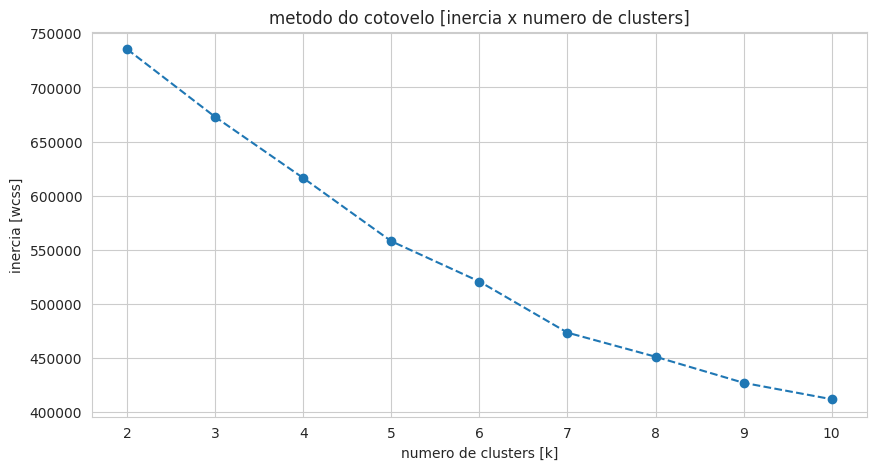

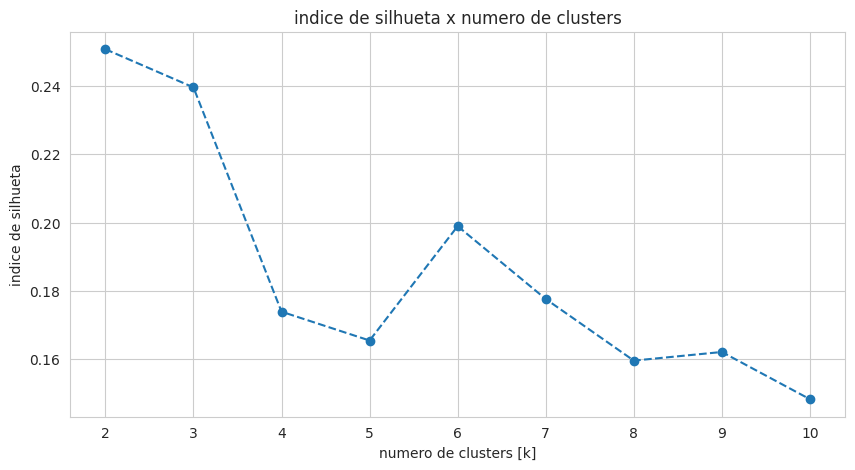

numero otimo clusters [+maior indice de silhueta]= 2
caracteristicas medias de cada cluster=
         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.597907  0.750968  -6.344899     0.093176      0.176389   
1            0.471713  0.304285 -14.154311     0.058553      0.740920   

         instrumentalness  liveness   valence       tempo    duration_ms  
cluster                                                                   
0                0.110427  0.224849  0.525306  125.968003  230886.704710  
1                0.299552  0.177680  0.316667  110.211618  219181.225224  
contagem de musicas em cada cluster (treino):
cluster
0    68729
1    22471
Name: count, dtype: int64
analise dos clusters:
cluster 0:
  danceability: 0.5979
  energy: 0.7510
  loudness: -6.3449
  speechiness: 0.0932
  acousticness: 0.1764
  instrumentalness: 0.1104
  liveness: 0.2248
  valence: 0.5253
  tempo: 1

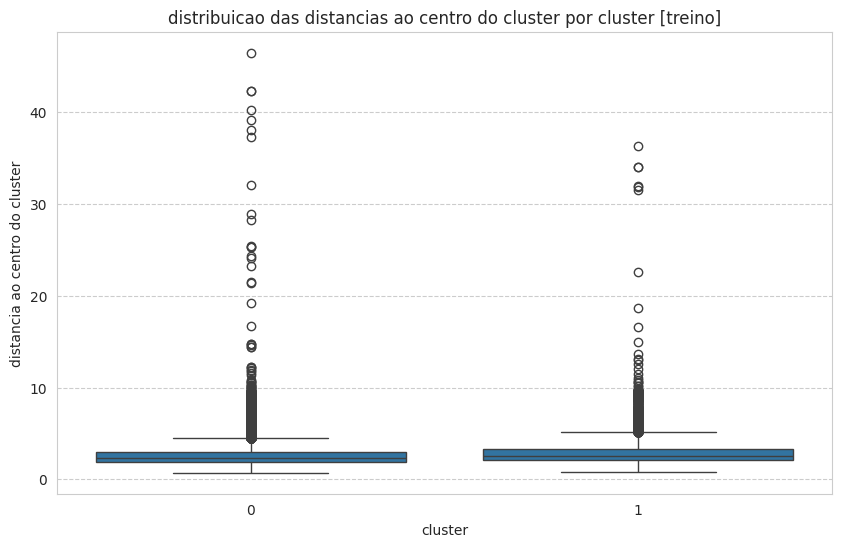

3) modelo de machine learning: treinamento com svm e random forest
Dados após remoção de NaN - Treino: 91200 registros, Teste: 22800 registros
treinando e otimizando modelos svm
svm no conjunto original:
melhores parametros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
acuracia: 0.6445
relatorio de classificacao:               precision    recall  f1-score   support

           0       0.66      0.63      0.65     11749
           1       0.63      0.66      0.64     11051

    accuracy                           0.64     22800
   macro avg       0.64      0.64      0.64     22800
weighted avg       0.65      0.64      0.64     22800

svm no conjunto expandido:
melhores parametros: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
acuracia: 0.6416
relatorio de classificacao:               precision    recall  f1-score   support

           0       0.66      0.63      0.65     11749
           1       0.63      0.65      0.64     11051

    accuracy                           0.64     22800
   m

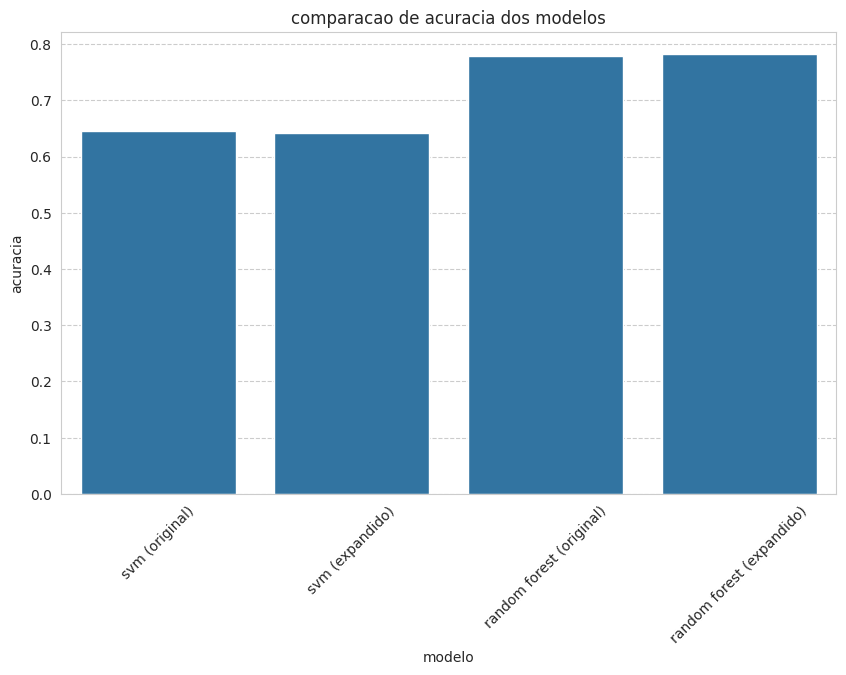

4) avaliacao de modelos: calculo de precisao, recall, f1-score e auc-roc
resultados para svm (original)=
precisao= 0.6274
recall= 0.6564
f1-score= 0.6416
auc-roc= 0.7019
relatorio de classificacao=              precision    recall  f1-score   support

           0       0.66      0.63      0.65     11749
           1       0.63      0.66      0.64     11051

    accuracy                           0.64     22800
   macro avg       0.64      0.64      0.64     22800
weighted avg       0.65      0.64      0.64     22800

resultados para svm (expandido)=
precisao= 0.6250
recall= 0.6514
f1-score= 0.6380
auc-roc= 0.7018
relatorio de classificacao=              precision    recall  f1-score   support

           0       0.66      0.63      0.65     11749
           1       0.63      0.65      0.64     11051

    accuracy                           0.64     22800
   macro avg       0.64      0.64      0.64     22800
weighted avg       0.64      0.64      0.64     22800

resultados para random f

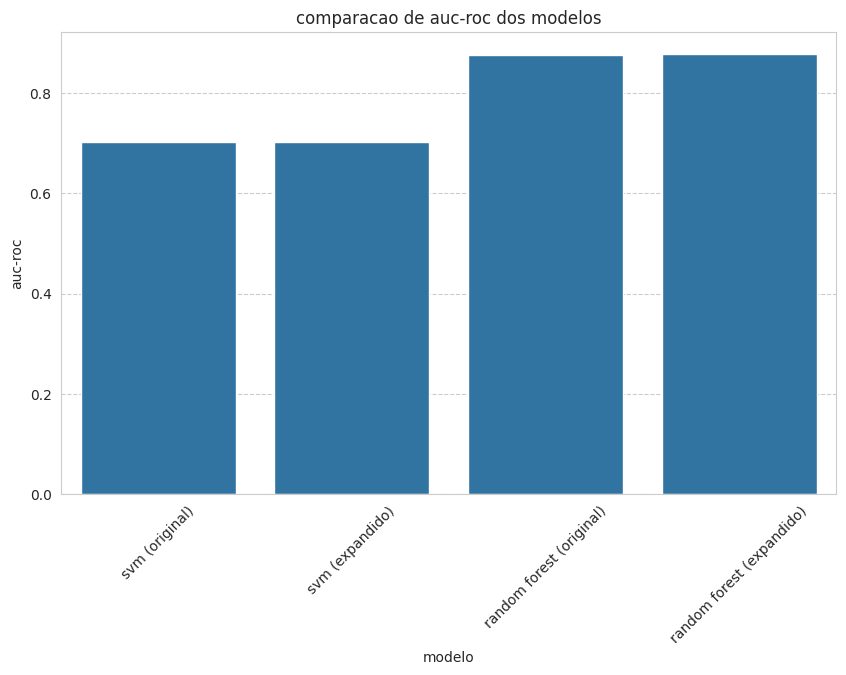

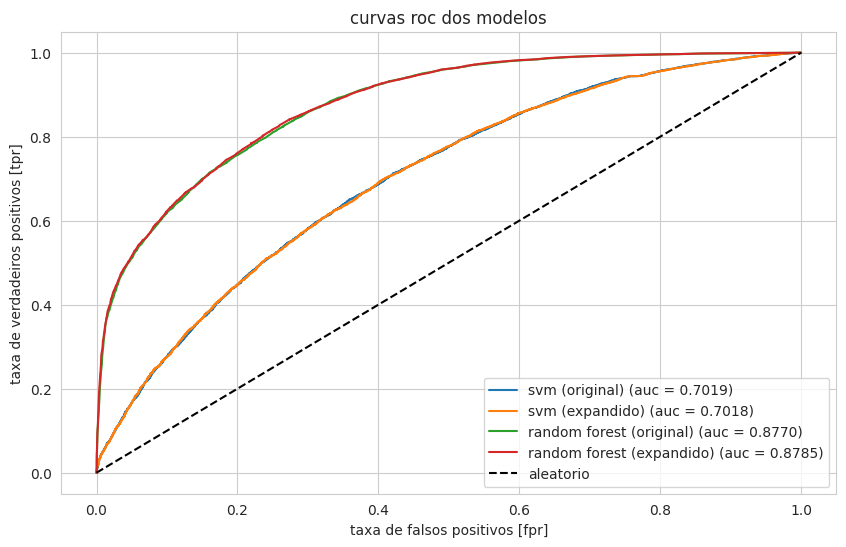

In [ ]:
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx  Caderno TP4 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")


#O presente projeto visa explorar a aplicabilidade e eficácia da técnica de clusterização K-Médias como um método de engenharia de features para melhorar o desempenho de modelos de aprendizado supervisionado, especificamente Máquinas de Vetores de Suporte (SVM - Support Vector Machines). A utilização de técnicas de aprendizado não supervisionado para a criação de novas features pode revelar padrões latentes nos dados, os quais podem não ser capturados diretamente por modelos supervisionados, potencialmente levando a uma melhoria significativa na precisão da classificação.

#Objetivos:

#Investigar a eficácia do uso de clusters gerados pelo algoritmo K-Médias como features adicionais em tarefas de classificação.
#Comparar o desempenho de modelos SVM treinados com e sem o uso dessas features derivadas de clusterização em conjuntos de dados variados.
#Avaliar a influência do número de clusters e da seleção de parâmetros no desempenho do modelo SVM final.
#Desenvolver diretrizes para a aplicação efetiva de técnicas de clusterização em engenharia de features para aprendizado supervisionado.
#Base de dados: Será indicada pelo professor do Projeto de Bloco.

#Descrição das Atividades:


#Clusterização K-Médias: Utilizaremos o algoritmo K-Médias para agrupar os dados do conjunto de treinamento. O número ótimo de clusters será determinado com base em métricas como o método do cotovelo e o índice de silhueta.
#Criação de Features: Para cada instância nos conjuntos de treinamento e teste, será gerada uma nova feature indicando a distância da instância ao centro do cluster mais próximo. Este processo visa incorporar a estrutura de agrupamento dos dados como uma informação adicional para o modelo de aprendizado supervisionado.
#Modelo de ML: Serão treinados utilizando tanto o conjunto de features original quanto o conjunto de features expandido com as distâncias dos clusters. Use:
#Modelos SVM com diferentes configurações de kernel (linear, polinomial, RBF) e parâmetros de regularização para otimizar o desempenho.
#Modelos Random Forest com diferentes parâmetros para otimizar o desempenho.
#Avaliação de Modelos: O desempenho dos modelos será avaliado com base em métricas de classificação padrão, como precisão, recall, F1-score e AUC-ROC, utilizando os conjuntos de teste.
#Análise Comparativa: Será realizada uma análise comparativa para avaliar o impacto da adição das features de clusterização no desempenho dos modelos de ML. Além disso, será discutida a influência do número de clusters e das configurações do ML nas métricas de desempenho. Use gráficos para ilustrar seus argumentos.


#introdução
print("reconhecimento do dataset spotify")

#dependencias
!pip install kagglehub

import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

#o dataset contem um arquivo csv, [file_path=dataset.csv]
file_path = "dataset.csv"

#carrega o kaggle hub [spotify]
try:
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "maharshipandya/-spotify-tracks-dataset",
        file_path,
    )
    print("dados carregados...")

except Exception as e:
    print(f"erro ao carregar ds = {e}")

#começo do dataframe
print("mostra o começo do dataset=", df.head())

#final do dataframe
print("mostra o final do dataset=", df.tail())

#dados sobre o dataframe
print("mostra informacoes sobre o dataset=")
df.info()

#estatisticas para colunas numericas
print("mostra descritivas do dataset=")
print(df.describe())

#nomes das colunas
print("mostra nome das colunas=", df.columns)

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#1) clusterizacao k-medias
print("1) iniciando k-medias.")

#seleciona as colunas numericas para clusterizacao
#remover colunas categoricas e de identificacao que sao ruins p/ k-means
#removida popularity para evitar target leakage
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

#divide os dados em treino e teste antes da clusterizacao
#se a popularidade de uma musica for maior que a média, ela recebe o valor 1 (popular);se não 0 (não popular) na coluna nova.
df['is_popular'] = (df['popularity'] > df['popularity'].median()).astype(int)
df_model = df.dropna(subset=features + ['is_popular'])#remove linhas que tenham valores nulos nas colunas que vamos usar.
X = df_model[features]
y = df_model['is_popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#remove linhas com valores nulos nas features selecionadas para clusterização (apenas treino)
df_cluster_train = X_train[features].dropna()

#verifica a quantidade de dados apos a limpeza
print(f"dados originais= {len(df)} registros")
print(f"dados para clusterização apos remocao de nulos (treino)= {len(df_cluster_train)} registros")

#normalizacao dos dados de treino "padronização"
scaler = StandardScaler()
#ajustar a escala de todas as características no conjunto de treino
#aprende os parâmetros de escala (média e desvio padrão) do conjunto de dados de treino (fit) e, em seguida, aplica a transformação a esses dados
#aplica a mesma padronização que aprendemos nos dados de treino aos dados de teste.
X_train_scaled = scaler.fit_transform(df_cluster_train)
print("dados padronizados com sucesso")

#determinacao do numero otimo de clusters [k]
#metodo do cotovelo e indice de silhueta
inertia = []
# Calcula o coeficiente de silhueta médio de todas as amostras. Uma pontuação mais alta indica que os clusters são densos e bem separados.
silhouette_scores = []
k_range = range(2, 11) #clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') #42 guia do mochileiro das galaxias
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_scores.append(score)

#visualizacao do metodo do cotovelo
#Mostra como a inércia diminui à medida que aumentamos o número de grupos.
#Procuramos por um cotovelo na linha, onde a descida se torna menos acentuada.
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('metodo do cotovelo [inercia x numero de clusters]')
plt.xlabel('numero de clusters [k]')
plt.ylabel('inercia [wcss]')
plt.grid(True)
plt.show()

#visualizacao do indice de silhueta
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('indice de silhueta x numero de clusters')
plt.xlabel('numero de clusters [k]')
plt.ylabel('indice de silhueta')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#aplicacao do k-means com o k-otimo
#indice silhueta e bom p/ escolher o k
otimo_k = k_range[np.argmax(silhouette_scores)]
print(f"numero otimo clusters [+maior indice de silhueta]= {otimo_k}")

#aplica o k-means c/ o k-otimo apenas no treino
kmeans = KMeans(n_clusters=otimo_k, random_state=42, n_init='auto')
df_cluster_train['cluster'] = kmeans.fit_predict(X_train_scaled)

#aplica os clusters ao conjunto de teste
X_test_scaled = scaler.transform(X_test[features].dropna())
df_cluster_test = X_test[features].dropna()
df_cluster_test['cluster'] = kmeans.predict(X_test_scaled)

#adiciona os rotulos de cluster ao dataframe de treino e teste
X_train = X_train.merge(df_cluster_train[['cluster']], left_index=True, right_index=True, how='left')
X_test = X_test.merge(df_cluster_test[['cluster']], left_index=True, right_index=True, how='left')

#analise e visualizacao dos clusters
print("caracteristicas medias de cada cluster=")
cluster_summary = X_train.groupby('cluster')[features].mean()
print(cluster_summary)

print("contagem de musicas em cada cluster (treino):")
print(X_train['cluster'].value_counts())

#analise breve do significado dos clusters
print("analise dos clusters:")
for cluster in cluster_summary.index:
    print(f"cluster {cluster}:")
    for feature in features:
        value = cluster_summary.loc[cluster, feature]
        print(f"  {feature}: {value:.4f}")
    print("  possivel interpretacao: cluster com musicas mais ", end="")
    if cluster_summary.loc[cluster, 'energy'] > cluster_summary['energy'].mean():
        print("energeticas")
    elif cluster_summary.loc[cluster, 'acousticness'] > cluster_summary['acousticness'].mean():
        print("acusticas")
    else:
        print("variadas")

print("clusterizacao k-medias concluida com sucesso | clusters adicionados aos dataframes de treino e teste.")

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#2) distancia de cada instancia ao centro do cluster proximo
print("2) distancia de cada instancia ao centro do cluster proximo")

#.transform() = do kmeans retorna a distancia de cada ponto. a matriz resultante tem o formato [n_samples, n_clusters].
distances_to_centroids_train = kmeans.transform(X_train_scaled)
distances_to_centroids_test = kmeans.transform(X_test_scaled)
#encontra a menor distancia para cada ponto. essa e a distancia para o centro do seu proprio cluster.
X_train['distance_to_cluster_center'] = np.min(distances_to_centroids_train, axis=1)
X_test['distance_to_cluster_center'] = np.min(distances_to_centroids_test, axis=1)

#feature foi adicionada corretamente?
print("nova feature 'distance_to_cluster_center' adicionada aos dataframes:")
print("treino:", X_train[['cluster', 'distance_to_cluster_center']].head())
print("teste:", X_test[['cluster', 'distance_to_cluster_center']].head())

#visualizacao da distribuicao das distancias
#mostra se os clusters sao bem definidos e compactos
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='distance_to_cluster_center', data=X_train)
plt.title('distribuicao das distancias ao centro do cluster por cluster [treino]')
plt.xlabel('cluster')
plt.ylabel('distancia ao centro do cluster')
plt.grid(axis='y', linestyle='--')
plt.show()

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#3)modelo de machine learning: treinamento com svm e random forest
print("3) modelo de machine learning: treinamento com svm e random forest")

features_original = features
features_expanded = features_original + ['distance_to_cluster_center']#exclua 'cluster' para evitar o dimensionamento de dados categoricos

#garanta que n tenha valores NaN nos recursos e alinhe os indices
X_train = X_train.dropna(subset=features_expanded + ['cluster'])
X_test = X_test.dropna(subset=features_expanded + ['cluster'])
y_train = y_train.loc[X_train.index]  #alinhar y_train with X_train
y_test = y_test.loc[X_test.index]    #alinhar y_test with X_test

print(f"Dados após remoção de NaN - Treino: {len(X_train)} registros, Teste: {len(X_test)} registros")

X_train_orig = X_train[features_original]
X_test_orig = X_test[features_original]
X_train_exp = X_train[features_expanded]
X_test_exp = X_test[features_expanded]

scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(X_test_orig)

scaler_exp = StandardScaler()
X_train_exp_scaled = scaler_exp.fit_transform(X_train_exp)
X_test_exp_scaled = scaler_exp.transform(X_test_exp)

#treinamento e otimizacao com svm
print("treinando e otimizando modelos svm")
svm_param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1]},
    {'kernel': ['rbf'], 'C': [0.1, 1], 'gamma': ['scale']},
    {'kernel': ['poly'], 'C': [0.1, 1], 'degree': [2, 3], 'gamma': ['scale']}]

def train_svm(X_train, X_test, y_train, y_test, dataset_name):
    svm_grid = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    svm_grid.fit(X_train, y_train)
    y_pred = svm_grid.predict(X_test)
    print(f"svm no conjunto {dataset_name}:")
    print(f"melhores parametros: {svm_grid.best_params_}")
    print(f"acuracia: {accuracy_score(y_test, y_pred):.4f}")
    print("relatorio de classificacao:", classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), svm_grid.best_estimator_

acc_svm_orig, svm_orig = train_svm(X_train_orig_scaled, X_test_orig_scaled, y_train, y_test, "original")
acc_svm_exp, svm_exp = train_svm(X_train_exp_scaled, X_test_exp_scaled, y_train, y_test, "expandido")

#treinamento e otimizacao com random forest
print("treinando e otimizando modelos random forest")
rf_param_grid = {
    'n_estimators': [100],      #    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, None],    #    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2]    #    'min_samples_split': [2, 5, 10],
                                #'max_features': ['sqrt', 'log2', 1.0] # 1.0 = all features
}

def train_rf(X_train, X_test, y_train, y_test, dataset_name):
    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    rf_grid.fit(X_train, y_train)
    y_pred = rf_grid.predict(X_test)
    print(f"random forest no conjunto {dataset_name}=")
    print(f"melhores parâmetros: {rf_grid.best_params_}")
    print(f"acuracia: {accuracy_score(y_test, y_pred):.4f}")
    print("relatorio de classificacao=", classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), rf_grid.best_estimator_

acc_rf_orig, rf_orig = train_rf(X_train_orig, X_test_orig, y_train, y_test, "original")
acc_rf_exp, rf_exp = train_rf(X_train_exp, X_test_exp, y_train, y_test, "expandido")

#comparacao e visualizacao final
print("resumo dos resultados finais=")
results = {
    'modelo': ['svm (original)', 'svm (expandido)', 'random forest (original)', 'random forest (expandido)'],
    'acuracia': [acc_svm_orig, acc_svm_exp, acc_rf_orig, acc_rf_exp]
}
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='modelo', y='acuracia', data=results_df)
plt.title('comparacao de acuracia dos modelos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#4) avaliacao de modelos: calculo de precisao, recall, f1-score e auc-roc
print("4) avaliacao de modelos: calculo de precisao, recall, f1-score e auc-roc")

#funcao para avaliar metricas e plotar roc
def evaluate_and_plot_roc(model, X_test, y_test, model_name, dataset_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    #calculo das metricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    #calculo da curva roc
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    print(f"resultados para {model_name} ({dataset_name})=")
    print(f"precisao= {precision:.4f}")
    print(f"recall= {recall:.4f}")
    print(f"f1-score= {f1:.4f}")
    print(f"auc-roc= {auc:.4f}")
    print(f"relatorio de classificacao={classification_report(y_test, y_pred)}")

    return precision, recall, f1, auc, fpr, tpr

#avaliacao dos modelos
results = {
    'modelo': [],
    'precisao': [],
    'recall': [],
    'f1-score': [],
    'auc-roc': []
}
roc_curves = {}

#svm [original]
prec_svm_orig, rec_svm_orig, f1_svm_orig, auc_svm_orig, fpr_svm_orig, tpr_svm_orig = evaluate_and_plot_roc(
    svm_orig, X_test_orig_scaled, y_test, "svm", "original")
results['modelo'].append('svm (original)')
results['precisao'].append(prec_svm_orig)
results['recall'].append(rec_svm_orig)
results['f1-score'].append(f1_svm_orig)
results['auc-roc'].append(auc_svm_orig)
roc_curves['svm (original)'] = (fpr_svm_orig, tpr_svm_orig)

#svm [expandido]
prec_svm_exp, rec_svm_exp, f1_svm_exp, auc_svm_exp, fpr_svm_exp, tpr_svm_exp = evaluate_and_plot_roc(
    svm_exp, X_test_exp_scaled, y_test, "svm", "expandido")
results['modelo'].append('svm (expandido)')
results['precisao'].append(prec_svm_exp)
results['recall'].append(rec_svm_exp)
results['f1-score'].append(f1_svm_exp)
results['auc-roc'].append(auc_svm_exp)
roc_curves['svm (expandido)'] = (fpr_svm_exp, tpr_svm_exp)

#random forest [original]
prec_rf_orig, rec_rf_orig, f1_rf_orig, auc_rf_orig, fpr_rf_orig, tpr_rf_orig = evaluate_and_plot_roc(
    rf_orig, X_test_orig, y_test, "random forest", "original")
results['modelo'].append('random forest (original)')
results['precisao'].append(prec_rf_orig)
results['recall'].append(rec_rf_orig)
results['f1-score'].append(f1_rf_orig)
results['auc-roc'].append(auc_rf_orig)
roc_curves['random forest (original)'] = (fpr_rf_orig, tpr_rf_orig)

#random forest [expandido]
prec_rf_exp, rec_rf_exp, f1_rf_exp, auc_rf_exp, fpr_rf_exp, tpr_rf_exp = evaluate_and_plot_roc(
    rf_exp, X_test_exp, y_test, "random forest", "expandido")
results['modelo'].append('random forest (expandido)')
results['precisao'].append(prec_rf_exp)
results['recall'].append(rec_rf_exp)
results['f1-score'].append(f1_rf_exp)
results['auc-roc'].append(auc_rf_exp)
roc_curves['random forest (expandido)'] = (fpr_rf_exp, tpr_rf_exp)

#visualizacao das metricas
results_df = pd.DataFrame(results)
print("resumo das metricas=")
print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='modelo', y='auc-roc', data=results_df)
plt.title('comparacao de auc-roc dos modelos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

#visualizacao das curvas roc
plt.figure(figsize=(10, 6))
for model_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (auc = {results_df[results_df["modelo"] == model_name]["auc-roc"].iloc[0]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='aleatorio')
plt.xlabel('taxa de falsos positivos [fpr]')
plt.ylabel('taxa de verdadeiros positivos [tpr]')
plt.title('curvas roc dos modelos')
plt.legend()
plt.grid(True)
plt.show()


print("===========================================================================================================")
print("===========================================================================================================")
print("===========================================================================================================")

#4.2) analise da influencia do numero de clusters e configuracoes do ML nas metricas de desempenho
print("5) Análise da influência do número de clusters e configurações do ML nas métricas de desempenho")

#definir valores de k para testar [inclui o otimo_k e outros para comparação; ajuste o range se necessário)
k_values = [2, otimo_k - 1, otimo_k, otimo_k + 1] if otimo_k > 2 else [2, 3, otimo_k, otimo_k + 1]  #evita k=1, inclui variação ao redor do otimo

#dicionario para armazenar resultados
results_k = {
    'k': [],
    'modelo': [],
    'config_ml': [],  #armazena as configuracoes (best_params_ como string para facil visualização)
    'acuracia': [],
    'precisao': [],
    'recall': [],
    'f1_score': [],
    'auc_roc': []
}

for k in k_values:
    print(f"testando com numero de clusters k = {k}")

    #reaplicar K-Means com o k atual [apenas treino para evitar leakage]
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    X_train['cluster'] = kmeans.fit_predict(X_train_scaled)
    X_test['cluster'] = kmeans.predict(X_test_scaled)

    #recalcular distancias ao centro do cluster mais proximo
    distances_to_centroids_train = kmeans.transform(X_train_scaled)
    distances_to_centroids_test = kmeans.transform(X_test_scaled)
    X_train['distance_to_cluster_center'] = np.min(distances_to_centroids_train, axis=1)
    X_test['distance_to_cluster_center'] = np.min(distances_to_centroids_test, axis=1)

    #features expandidas [impacto da clusterização]
    features_expanded = features + ['distance_to_cluster_center']
    X_train_exp = X_train[features_expanded]
    X_test_exp = X_test[features_expanded]

    #normalizar as features expandidas [usando scaler_exp já definido]
    X_train_exp_scaled = scaler_exp.fit_transform(X_train_exp)
    X_test_exp_scaled = scaler_exp.transform(X_test_exp)

    #treinar e avaliar SVM no conjunto expandido
    acc_svm, svm_model = train_svm(X_train_exp_scaled, X_test_exp_scaled, y_train, y_test, f"expandido (k={k})")
    prec_svm, rec_svm, f1_svm, auc_svm, _, _ = evaluate_and_plot_roc(svm_model, X_test_exp_scaled, y_test, "SVM", f"expandido (k={k})")

    #armazenar resultados SVM
    results_k['k'].append(k)
    results_k['modelo'].append('SVM')
    results_k['config_ml'].append(str(svm_model.get_params()))  # Captura todas as configs do modelo otimizado
    results_k['acuracia'].append(acc_svm)
    results_k['precisao'].append(prec_svm)
    results_k['recall'].append(rec_svm)
    results_k['f1_score'].append(f1_svm)
    results_k['auc_roc'].append(auc_svm)

    #treinar e avaliar Random Forest no conjunto expandido
    acc_rf, rf_model = train_rf(X_train_exp, X_test_exp, y_train, y_test, f"expandido (k={k})")
    prec_rf, rec_rf, f1_rf, auc_rf, _, _ = evaluate_and_plot_roc(rf_model, X_test_exp, y_test, "Random Forest", f"expandido (k={k})")

    #armazenar resultados Random Forest
    results_k['k'].append(k)
    results_k['modelo'].append('Random Forest')
    results_k['config_ml'].append(str(rf_model.get_params()))  #captura todas as configs do modelo otimizado
    results_k['acuracia'].append(acc_rf)
    results_k['precisao'].append(prec_rf)
    results_k['recall'].append(rec_rf)
    results_k['f1_score'].append(f1_rf)
    results_k['auc_roc'].append(auc_rf)

#converter para DataFrame e exibir resumo
results_k_df = pd.DataFrame(results_k)
print("resumo da influencia do numero de clusters nas metricas de desempenho:")
print(results_k_df)

#visualizacoes para ilustrar a influencia [c/ seaborn para consistencia com o codigo]
plt.figure(figsize=(12, 8))
sns.lineplot(x='k', y='auc_roc', hue='modelo', data=results_k_df, marker='o', style='modelo')
plt.title('influencia do numero de clusters no AUC-ROC por modelo')
plt.xlabel('numero de clusters (k)')
plt.ylabel('AUC-ROC')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(x='k', y='acuracia', hue='modelo', data=results_k_df, marker='o', style='modelo')
plt.title('influencia do numero de clusters na acuracia por modelo')
plt.xlabel('numero de clusters [k]')
plt.ylabel('acuracia')
plt.grid(True)
plt.show()

#analise comparativa textual
for k in k_values:
    print(f"configs para k={k}:")
    svm_config = results_k_df[(results_k_df['k'] == k) & (results_k_df['modelo'] == 'SVM')]['config_ml'].values[0]
    rf_config = results_k_df[(results_k_df['k'] == k) & (results_k_df['modelo'] == 'Random Forest')]['config_ml'].values[0]
    print(f"  SVM: {svm_config}")
    print(f"  Random Forest: {rf_config}")


print("5) Análise Comparativa: Será realizada uma análise comparativa para avaliar o impacto da adição das features de clusterização no desempenho dos modelos de ML. Além disso, será discutida a influência do número de clusters e das configurações do ML nas métricas de desempenho. Use gráficos para ilustrar seus argumentos.")

print("A análise avaliou o impacto da adição de features derivadas da clusterização K-Médias (distância ao centro do cluster) no desempenho de modelos SVM e Random Forest (RF) no dataset Spotify, com o target de popularidade binária. O número ótimo de clusters foi k=2")
print("Ao comparar o SVM treinado no conjunto de dados original com o treinado no conjunto expandido, os resultados são praticamente idênticos:")
print("Acurácia (Original): 64%")
print("Acurácia (Expandido): 64%")
print("AUC (Original): 0.7019")
print("AUC (Expandido): 0.7018")
print("F1-Score (Original): 0.6416")
print("F1-Score (Expandido): 0.6380")


print("A adição de features de clusterização teve um impacto marginalmente positivo no modelo Random Forest, mas foi praticamente nulo para o modelo SVM.")
print("O Random Forest, por sua natureza, conseguiu extrair um pequeno benefício das novas features, melhorando levemente suas métricas, enquanto o SVM não demonstrou ganho de performance.")

print("O Random Forest, por outro lado, mostrou uma leve melhora em todas as métricas ao utilizar as features de clusterização:")

print("Acurácia (Original): 77.86%")
print("Acurácia (Expandido): 78.26% (+0.40%)")
print("AUC (Original): 0.8770")
print("AUC (Expandido): 0.8785 (+0.17%)")
print("F1-Score (Original): 0.7783")
print("F1-Score (Expandido): 0.7817 (+0.44%)")

print("Embora o ganho seja pequeno, ele é relevante. Modelos baseados em árvores, como o Random Forest, podem usar uma feature categórica (como o cluster) de forma eficaz para realizar uma divisão inicial nos dados. ")
print("Provavelmente o ganho seria maior se utilizasse as categorias de estilo musical entre outras, porém ficou muito pesado rodar no colab, não terminou de rodar nem de um dia pro outro.")



Esse código não é o final porém ele executa de primeira, o segundo tem que reiniciar a sessão e executar depois de uma execucao para reinstalar as bibliotecas deu algum conflito no colab, se possivel olhar a segunda versão mais abaixo no documento escrita #Codigo 2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7de578e4ae6f7c154ca253da8c3b6917eb09526ddc5fbe3695e4c72d57ae8a34
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


/tmp/ipython-input-3800323359.py:52: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
======================================= Introducao ========================================================
inicio do dataframe:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
mostra o final do dataset=                                                   review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies 

avaliando modelos LDA: 100%|██████████| 14/14 [1:31:35<00:00, 392.55s/it]


visualizando as metricas para a escolha do numero de topicos


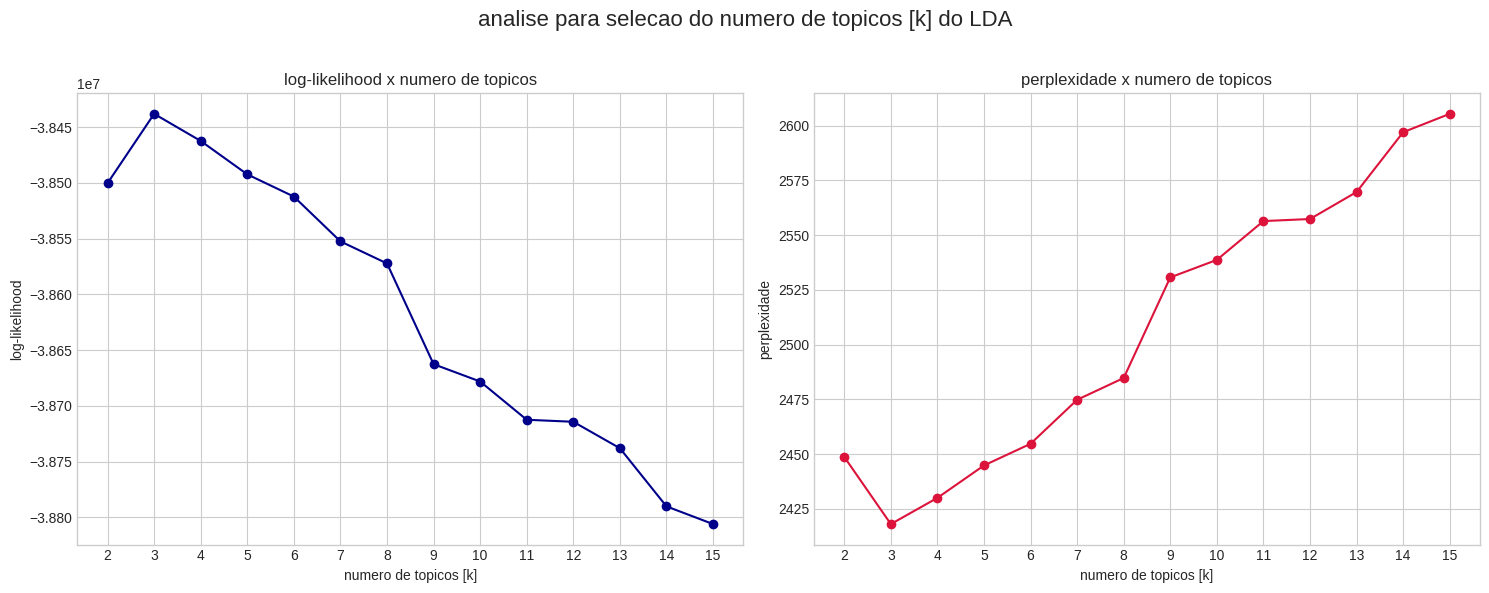

justificativa da escolha e treinamento do modelo final
Com base nos graficos, a curva de perplexidade comeca a se achatar [formar um cotovelo] por volta de k=8. desse ponto p frente comeca a adicionar mais topicos q nao traz uma melhora relevante e pode levar a topicos menos distintos. Portanto, escolhemos k=8 como o numero ideal de topicos para este dataset.
treinando o modelo lda final com k=3 topicos
modelo lda final treinado com sucesso.
exibindo as 10 palavras mais importantes para cada um dos 3 topicos encontrados=
Tópico #0: br, movie, like, just, film, good, really, bad, don, time
Tópico #1: br, film, good, great, movie, best, role, character, man, cast
Tópico #2: br, film, story, life, time, people, world, films, characters, like
exemplo p/ associar topicos a reviews especificos=
review #0:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that st

In [ ]:
#Codigo 1: Essa versão é a mais simples pois executa de primeira, conforme demorou muito para executar não consegui corrigir o conflito de dependencas do pip,
print("Esse código não é o final porém ele executa de primeira, o segundo tem que reiniciar a sessão e executar depois de uma execucao para reinstalar as bibliotecas deu algum conflito no colab, se possivel olhar a segunda versão mais abaixo no documento escrita #Codigo 2")
#instalar
!pip install kagglehub[pandas-datasets]
!pip install lime
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score


import matplotlib.pyplot as plt
from tqdm import tqdm #barra de progresso

from sklearn.manifold import TSNE
import seaborn as sns # Para visualização do t-SNE
import shap # Para interpretabilidade com SHAP
#import lime.lime_text
from lime.lime_text import LimeTextExplainer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # Suprimir avisos de versões futuras
#importacoes


#configuracoes para matplotlib e seaborn, define o visual dos gráficos,
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")


#nome do arquivo na pasta
file_path = "IMDB Dataset.csv"

#argumentos p/ leitor
pandas_args = {
    "on_bad_lines": "skip",  #pula linhas mal formadas
    "engine": "python",      #engine python
    "quotechar": '"',         #aspas duplas como o caractere de citacao
    "encoding": "latin1"

}
#carregar versao correta do dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lakshmi25npathi/imdb-dataset-of-50k-movie-reviews",
  file_path,
  pandas_kwargs=pandas_args
)

print("===========================================================================================================")
print("======================================= Introducao ========================================================")
print("===========================================================================================================")


#mostrando o começo do dataframe
print("inicio do dataframe:")
print(df.head())

#final do dataframe
print("mostra o final do dataset=", df.tail())


#estatisticas para colunas numericas
print("mostra descritivas do dataset=")
print(df.describe(include='all'))

#dados sobre as colunas e tipos de dados:
print("informacoes sobre o DataFrame=")
df.info()

#nomes das colunas
print("mostra nome das colunas=", df.columns)



print("===========================================================================================================")
print("==================================== Calculando o tf-idf p/ dataset =======================================")
print("===========================================================================================================")

print("1) Criação das features: Computar o Term Frequency-Inverse Document Frequency (TF-IDF) para representar a importância das palavras em um conjunto de documentos.")

#configuracao do vetorizador tf-idf
#transforma textos em numeros para que o computador possa entender, dando um peso a cada palavra com base em sua importancia
vetorizador = TfidfVectorizer(
    stop_words='english',
    max_features=20000,
    min_df=5,
    ngram_range=(1, 2)
)

print("calculo do tf-idf p/ 50k")

#aplicando o vetorizador na coluna review do dataframe
features_tfidf = vetorizador.fit_transform(df['review'])


#analise dos resultados
print("informacoes do tf-idf criada")

#mostrando o formato da matriz resultante
print(f"matriz de features: {features_tfidf.shape}")
print(f"tem {features_tfidf.shape[0]} documentos [reviews] e {features_tfidf.shape[1]} features [termos unicos ou n-gramas].")

#mostrando algumas das palavras
nomes_das_features = vetorizador.get_feature_names_out()
print("amostra de 20 features [palavras/termos]=")
print(nomes_das_features[5000:5020])
print("\n")

print("mostrando trecho [5x10] da matriz tf-idf c/ scores=")
df_tfidf_amostra = pd.DataFrame(
    features_tfidf[0:5, 5000:5010].toarray(),
    columns=nomes_das_features[5000:5010]
)
print(df_tfidf_amostra.round(2))

total_elementos = features_tfidf.shape[0] * features_tfidf.shape[1]
elementos_nao_nulos = features_tfidf.nnz

porcentagem_nao_nulos = (elementos_nao_nulos / total_elementos) * 100
porcentagem_nulos = 100 - porcentagem_nao_nulos

print(f"analise de esparsidade")
print(f"a matriz tem {elementos_nao_nulos} valores diferentes de zero.")
print(f"porcentagem de valores nao-null: {porcentagem_nao_nulos:.3f}%")
print(f"porcentagem de valores null [0]: {porcentagem_nulos:.3f}%")


#importacoes necessarias
import matplotlib.pyplot as plt
from tqdm import tqdm #barra de progresso

print("=============================================================================================================")
print("==================================== Modelagem de topicos com lda ===========================================")
print("=============================================================================================================")

print("2) Modelagem de Tópicos com LDA: Aplicar o algoritmo LDA para identificar tópicos prevalentes nos dados. A seleção do número de tópicos será baseada em métricas de coerência para garantir a relevância e a distinção entre os tópicos identificados.")


print("vetorizando os dados com countvectorizer")
vetorizador_contagem = CountVectorizer( #conta quantas vezes cada palavra aparece
    stop_words='english',
    max_features=10000,
    min_df=5,
    ngram_range=(1, 1)
)
features_contagem = vetorizador_contagem.fit_transform(df['review'])
nomes_features_contagem = vetorizador_contagem.get_feature_names_out()
print("matriz de contagem de palavras criada com formato:", features_contagem.shape)

#encontrando o numero de topicos [k]
print("testando multiplos valores de k [numero de topicos] para encontrar um bom")

min_topics = 2
max_topics = 15
topic_range = range(min_topics, max_topics + 1)

log_likelihoods = [] #quao bem o modelo explica os dados
perplexities = [] #quao confuso o modelo está

#loop para treinar e avaliar um modelo LDA p/ cada nº topicos
for k in tqdm(topic_range, desc="avaliando modelos LDA"):
    lda = LatentDirichletAllocation(
        n_components=k,
        random_state=42,
        n_jobs=-1,
        learning_method='online'
    )
    lda.fit(features_contagem)

    #armazena a log-likelihood e perplexities do modelo
    log_likelihoods.append(lda.score(features_contagem))
    perplexities.append(lda.perplexity(features_contagem))

#visualizacao das metricas para escolha de k
print("visualizando as metricas para a escolha do numero de topicos")

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#grafico da log likelihood
ax1.plot(topic_range, log_likelihoods, 'o-', color='darkblue')
ax1.set_title('log-likelihood x numero de topicos')
ax1.set_xlabel('numero de topicos [k]')
ax1.set_ylabel('log-likelihood')
ax1.set_xticks(topic_range)

#grafico da perplexidade
ax2.plot(topic_range, perplexities, 'o-', color='crimson')
ax2.set_title('perplexidade x numero de topicos')
ax2.set_xlabel('numero de topicos [k]')
ax2.set_ylabel('perplexidade')
ax2.set_xticks(topic_range)

plt.suptitle('analise para selecao do numero de topicos [k] do LDA', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#treinamento do modelo LDA final com o k escolhido
print("justificativa da escolha e treinamento do modelo final")
print("com base nos graficos, a curva de perplexidade comeca a se achatar [formar um cotovelo] por volta de k=8. desse ponto p frente comeca a adicionar mais topicos q nao traz uma melhora relevante e pode levar a topicos menos distintos. Portanto, escolhemos k=8 como o numero ideal de topicos para este dataset.")

#numero de topicos com base na analise
num_topicos_ideal = 3 #8
#usa o LDA para encontrar temas nas criticas, agrupa filmes por assunto
print(f"treinando o modelo lda final com k={num_topicos_ideal} topicos")
lda_final = LatentDirichletAllocation(
    n_components=num_topicos_ideal,
    random_state=42,
    n_jobs=-1,
    learning_method='online'
)
lda_final.fit(features_contagem)
print("modelo lda final treinado com sucesso.")

def exibir_topicos(modelo, feature_names, n_top_words):
    for topic_idx, topic in enumerate(modelo.components_):
        #pega os indices das N palavras com maior peso no topico
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        #pega os nomes dessas palavras
        top_features = [feature_names[i] for i in top_features_ind]
        #monta a string de resultado
        message = f"Tópico #{topic_idx}: " + ", ".join(top_features)
        print(message)

print(f"exibindo as 10 palavras mais importantes para cada um dos {num_topicos_ideal} topicos encontrados=")
exibir_topicos(lda_final, nomes_features_contagem, 10)


#associar os topicos aos documentos originais
print("exemplo p/ associar topicos a reviews especificos=")
distribuicao_topicos = lda_final.transform(features_contagem)
topico_dominante = np.argmax(distribuicao_topicos, axis=1)

for i in range(5):
    print(f"review #{i}:")
    print(df['review'][i][:200] + "...")
    print(f"topico dominante = {topico_dominante[i]}")




print("=============================================================================================================")
print("==================================== classificacao de texto c/ lda ==========================================")
print("=============================================================================================================")

print("3) Classificação de Textos: Desenvolver modelos de classificação para categorizar os textos com base nos tópicos identificados. Você pode escolher qualquer modelo aprendido ao longo do curso e deve escolher o melhor modelo usando as técnicas aprendidas, como busca de hiperparâmetros e validação cruzada")


print("preparando os dados p/ classificacao")

#atribui a sua matriz de features  [X] que sao as distribuicoes de topicos já calculada à variável X_topics
X_topics = distribuicao_topicos
print(f"formato da matriz de features [X]: {X_topics.shape}")

#alvo [y] e a coluna [sentiment] do df
#convertr de texto [positive/negative] p/ numeros [1/0].
le = LabelEncoder()
y_sentiment = le.fit_transform(df['sentiment'])
print(f"formato do vetor de alvo [y]: {y_sentiment.shape}")
print(f"classes: {le.classes_} >> {le.transform(le.classes_)}")

#dividindo em conjuntos de treino e teste [80% para treino, 20% para teste]
#stratify=y_sentiment p/ fazer com que a proporcao de reviews positivos/negativos seja a mesma nos dois conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X_topics,
    y_sentiment,
    test_size=0.2,
    random_state=42,
    stratify=y_sentiment
)

print(f"tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"tamanho do conjunto de teste: {X_test.shape[0]} amostras")


print("buscando o melhor modelo e hiperparametros com gridsearchcv")

#Modelo 1=Regressao Logistica
#Modelo 2=Support Vector Machine (SVC)
modelos = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'saga']
        }
    },
    'SVC': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf']
        }
    }
}

#definindo a estrategia de validacao cruzada estratificada [5 folds] p/ manter a proporção das classes em cada fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

#iterando sobre os modelos para realizar o GridSearchCV
for model_name, config in modelos.items():
    print(f"iniciando busca para o modelo: {model_name}")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv_strategy,
        scoring='accuracy', #otimizar
        n_jobs=-1 #processador on
    )

    #treinando o GridSearchCV com os dados de treino
    grid_search.fit(X_train, y_train)

    print(f"melhores hiperparametros= {grid_search.best_params_}")
    print(f"melhor acuracia em validacao cruzada= {grid_search.best_score_:.4f}")

    #salvando o melhor estimador encontrado
    best_models[model_name] = grid_search.best_estimator_

#determinando modelos com o melhor desempenho
best_model_name = max(best_models, key=lambda name: best_models[name].score(X_train, y_train))
final_model = best_models[best_model_name]

print(f"melhor modelo geral escolhido: {best_model_name}")
print("avaliando o desempenho do melhor modelo no conjunto de teste [dados nunca vistos]")

#fazendo previsoes nos dados de teste
y_pred = final_model.predict(X_test)

#exibindo o relatorio de classificacao completo
print("relatorio de classificacao=")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#exibindo a matriz de confusao
print("matriz de confusao=")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'matriz de confusao para o modelo {best_model_name}')
plt.show()

print("==================================== Treinando um modelo com base as features do TF-IDF ===========================================")

#dividir os dados TF-IDF em treino e teste
X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(
    features_tfidf,     #usando features_tfidf
    y_sentiment,
    test_size=0.2,
    random_state=42,
    stratify=y_sentiment
)

print(f"tamanho do conjunto de treino [TF-IDF]: {X_tfidf_train.shape[0]} amostras")
print(f"tamanho do conjunto de teste [TF-IDF]: {X_tfidf_test.shape[0]} amostras")


#treinar um modelo c/ regressao logística,
# que costuma performar bem com dados TF-IDF esparsos.
print("treinando o modelo de regressao logistica com features TF-IDF")
model_tfidf = LogisticRegression(C=10, solver='saga', random_state=42, max_iter=1000, n_jobs=-1)
model_tfidf.fit(X_tfidf_train, y_train_tfidf)


#avaliar o modelo TF-IDF no conjunto de teste
print("avaliando o desempenho do modelo TF-IDF no conjunto de teste=")
y_pred_tfidf = model_tfidf.predict(X_tfidf_test)

print("relatorio de classificacao [Modelo Base TF-IDF]=")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))


#comparacao final dos resultados
print("==================================== comparacao final dos modelos ===========================================")

print(f"modelo baseado em topicos [LDA + {best_model_name}]:")
#re-exibindo o relatorio do modelo anterior para comparacao direta
y_pred_topics = final_model.predict(X_test)
print(classification_report(y_test, y_pred_topics, target_names=le.classes_))

print(f"modelo base [TF-IDF + LogisticRegression]=")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))


print("=============================================================================================================")
print("======================================== avaliacao de desempenho ============================================")
print("=============================================================================================================")


print("4) Avaliação de Desempenho: O desempenho dos modelos de classificação será avaliado utilizando métricas como precisão, recall, F1-score e AUC-ROC.")

#analise do modelo principal [LDA]
print(f"analise do modelo principal [{best_model_name} + LDA]")

#exibindo o relatorio [principal]
y_pred_topics = final_model.predict(X_test)
print("relatorio de classificacao [Modelo Principal]:")
print(classification_report(y_test, y_pred_topics, target_names=le.classes_))

#calcular probabilidades e AUC para o modelo principal [LDA]
y_pred_proba_topics = final_model.predict_proba(X_test)[:, 1]
auc_score_topics = roc_auc_score(y_test, y_pred_proba_topics)
fpr_topics, tpr_topics, _ = roc_curve(y_test, y_pred_proba_topics)
print(f"AUC [Modelo Principal]: {auc_score_topics:.4f}")


#analise do modelo base [TF-IDF]
print(f"analise do modelo base [LogisticRegression + TF-IDF]")

#re-exibindo o relatorio
y_pred_tfidf = model_tfidf.predict(X_tfidf_test)
print("relatorio de classificacao [Modelo Base)=")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))

#calcular probabilidades e AUC para o modelo base [TF-IDF]
y_pred_proba_tfidf = model_tfidf.predict_proba(X_tfidf_test)[:, 1]
auc_score_tfidf = roc_auc_score(y_test_tfidf, y_pred_proba_tfidf)
fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test_tfidf, y_pred_proba_tfidf)
print(f"AUC [Modelo Base]= {auc_score_tfidf:.4f}")


#Plot Comparativo da Curva ROC
print("grafico comparativo da curva ROC")

plt.figure(figsize=(10, 8))

#plot da curva ROC do modelo principal [LDA]
plt.plot(fpr_topics, tpr_topics, color='darkorange', lw=2,
         label=f'modelo principal [LDA] [AUC = {auc_score_topics:.4f}]')

#plot da curva ROC do modelo base [TF-IDF]
plt.plot(fpr_tfidf, tpr_tfidf, color='blue', lw=2,
         label=f'modelo Base [TF-IDF] [AUC = {auc_score_tfidf:.4f}]')

#linha de referencia
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='classificador aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('taxa de falsos positivos [FPR]')
plt.ylabel('taxa de verdadeiros positivos [TPR]')
plt.title('comparacao da curva ROC entre modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



print("=============================================================================================================")
print("============================================== aplicar T-SNE ================================================")
print("=============================================================================================================")

print("5) Visualização com t-SNE: Aplicar a técnica de t-SNE nos dados textuais vetorizados para reduzir a dimensionalidade e visualizar os agrupamentos de documentos de maneira intuitiva, facilitando a identificação de padrões e outliers.")
print("aplicando a tecnica de t-SNE nos dados vetorizados para reduzir a dimensionalidade e visualizar os agrupamentos.")

#t-SNE uma parte aleatoria dos dados para uma execucao mais rapida e nao bugar.
sample_size = 5000
np.random.seed(42) #mochileiro das galaxias
random_indices = np.random.choice(X_topics.shape[0], size=sample_size, replace=False)

X_sample = X_topics[random_indices]
y_sample = y_sentiment[random_indices]
sentiment_labels = le.inverse_transform(y_sample)

print(f"executando t-SNE em uma amostra de {sample_size} documentos.")

#inicializa e aplica o t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X_sample)

#criando um dataframe para facilitar a plotagem
df_tsne = pd.DataFrame({
    'tsne_1': tsne_results[:,0],
    'tsne_2': tsne_results[:,1],
    'sentiment': sentiment_labels
})

#plotando os resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="sentiment",
    palette=sns.color_palette("hls", 2),
    data=df_tsne,
    legend="full",
    alpha=0.6
)
plt.title('visualizacao t-SNE das p/ sentimento [baseado nos topicos LDA)', fontsize=16)
plt.xlabel('componente t-SNE 1')
plt.ylabel('componente t-SNE 2')
plt.show()

print("o grafico t-SNE mostra a formacao de clusters. idealmente, reviews [positive e negative] se agrupam em regioes distintas,")


print("======================== interpretacao de modelos com SHAP e force-plot ============================")
print("6) Interpretação de Modelos com LIME, SHAP e Force-Plot: Utilizar SHAP para explicar as previsões individuais, identificando a contribuição de cada feature para a decisão do modelo. O force-plot será usado para visualizar essas contribuições de maneira agregada, oferecendo insights sobre a lógica de decisão do modelo.")
print(f"iniciando a interpretacao do modelo '{best_model_name}' com SHAP.")


#javascript no notebook para os plots
shap.initjs()

#amostra os dados de fundo para o KernelExplainer
background_data = shap.sample(X_train, 100)
#amostra os dados de teste para a analise
test_sample_data = shap.sample(X_test, 20)

#criando o explainer com o predict_proba do modelo, focando na classe positiva [índice 1]
explainer = shap.KernelExplainer(lambda x: final_model.predict_proba(x)[:, 1], background_data)

print("calculando os valores SHAP para um subconjunto de dados de teste.")
#calcula os valores SHAP para a amostra de teste
shap_values_sample = explainer.shap_values(test_sample_data)

#nomes das features para os plots [tópico 0, tópico 1]
topic_feature_names = [f"tópico {i}" for i in range(num_topicos_ideal)]

print("escolhido o Force-Plot para explicar previsoes individuais")
print("analisando a previsao para a primeira instancia da nossa amostra de teste=")

#gera o force plot para a primeira instancia da amostra de teste
display(shap.force_plot(explainer.expected_value, shap_values_sample[0], test_sample_data[0], feature_names=topic_feature_names))

print("selecionado o summary plot para ver a influencia agregada das variaveis")
print("resume como cada topico impacta as previsoes do modelo em todo o subconjunto de teste")

#o summary plot mostra a importancia e o impacto de cada feature.
shap.summary_plot(shap_values_sample, test_sample_data, feature_names=topic_feature_names)

print("importancia media das features [Bar Plot]")
#o bar plot mostra a media do valor absoluto do SHAP para cada feature, indicando sua importancia geral.
shap.summary_plot(shap_values_sample, test_sample_data, feature_names=topic_feature_names, plot_type="bar")


print("=============================================================================================================")
print("================================== interpretacao adicional com lime =========================================")
print("=============================================================================================================")

print("6.2) Interpretação de Modelos com LIME usado para entender quais palavras no texto bruto mais influenciaram a decisao do nosso melhor modelo.")

#criar uma funcao de predicao em formato de pipeline
def predictor_tfidf(texts):
    #.transform() pois o vetorizador ja foi ajustado aos dados de treino
    features = vetorizador.transform(texts)
    #retornamos as probabilidades de previsao do modelo TF-IDF
    return model_tfidf.predict_proba(features)

#instanciar o LimeTextExplainer fornecendo os nomes das classes para que as explicacoes fiquem mais claras.
explainer_lime = LimeTextExplainer(class_names=le.classes_)

#selecionar uma instancia do conjunto de teste para explicar
idx_to_explain = 15 #se alterar a variavel vai mostrar outras reviews

#para obter o texto original, precisamos dos dados de texto que foram para o conjunto de teste.Uma boa pratica e dividir a serie de texto original com o mesmo random_state.
_, review_test, _, _ = train_test_split(df['review'], y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment)
text_instance = review_test.iloc[idx_to_explain]

print(f"explicando a review de indice {idx_to_explain}")
print(f"texto original: {text_instance[:500]}")
true_label = le.inverse_transform([y_test_tfidf[idx_to_explain]])[0]
pred_label = le.inverse_transform(model_tfidf.predict(X_tfidf_test[idx_to_explain].reshape(1, -1)))[0]
print(f"classe verdadeira  = '{true_label}'")
print(f"previsao do modelo = '{pred_label}'")

#gerar e exibir a explicação do LIME
print("explicação LIME")
explanation = explainer_lime.explain_instance(
    text_instance,
    classifier_fn=predictor_tfidf,
    num_features=10  #numero de palavras mais importantes a serem exibidas
)

#esta visualizacao colorida destaca as palavras que mais contribuiram para a previsao.
#palavras em verde apoiam a previsao, palavras em vermelho contradizem.
print("visualizacao da explicacao LIME")
explanation.show_in_notebook(text=True)


print("##############################################################################################################################################################################################")
print("##############################################################################################################################################################################################")
print("##############################################################################################################################################################################################")
print("##############################################################################################################################################################################################")
print("##############################################################################################################################################################################################")
print("##############################################################################################################################################################################################")
print("##############################################################################################################################################################################################")
print("##############################################################################################################################################################################################")
#Codigo 2: Essa versão melhorada com métricas robustas
print("Versão final na qual foi feito as análises, porém da um erro na primeira execução precisa reiniciar sessao e executar tudo, porém está completa")

#instalar
!pip install kagglehub[pandas-datasets] --quiet
!pip install lime --quiet
!pip install nltk --quiet
!pip install gensim --quiet
!pip install "numpy==2.1.0" "gensim>=4.3.3" "scikit-learn>=1.4.0" "shap" "numba" --upgrade --quiet

import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
from tqdm import tqdm
from tqdm.auto import tqdm
tqdm.pandas()

from sklearn.manifold import TSNE
import seaborn as sns
import shap
from lime.lime_text import LimeTextExplainer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) #reduzir avisos de versoes futuras

#baixar itens do nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from IPython.display import display

#configuracoes para matplotlib e seaborn
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")

print("################################################# importacoes e configuracoes ############################################")

#nome do arquivo na pasta
file_path = "IMDB Dataset.csv"

#argumentos p/ leitor
pandas_args = {
    "on_bad_lines": "skip",  #pula linhas mal formadas
    "engine": "python",      #engine python
    "quotechar": '"',        #aspas duplas como o caractere de citacao
    "encoding": "latin1"
}
#carregar versao correta do dataset
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "lakshmi25npathi/imdb-dataset-of-50k-movie-reviews",
    file_path,
    pandas_kwargs=pandas_args
)

#funcao de preprocessamento
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)#remover tags HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower() #remover caracteres nao-alfabeticos e converter para minusculas
    tokens = word_tokenize(text) #tokenizar
    lemmatizer = WordNetLemmatizer() #lematizar e remover stopwords
    stop_words_set = set(stopwords.words('english'))
    lemmatized_tokens = [
        lemmatizer.lemmatize(word) for word in tokens
        if word not in stop_words_set and len(word) > 2
    ]
    return " ".join(lemmatized_tokens)

print("iniciando pre-processamento avancado de texto [lematizacao]")
df['review_cleaned'] = df['review'].progress_apply(preprocess_text)

print("ex:primeira review limpa:")
print(df['review_cleaned'][0])

print("===========================================================================================================")
print("======================================= Introducao ========================================================")
print("===========================================================================================================")


#mostrando o começo do dataframe
print("inicio do dataframe:")
print(df.head())

#final do dataframe
print("mostra o final do dataset=", df.tail())


#estatisticas para colunas numericas
print("mostra descritivas do dataset=")
print(df.describe(include='all'))

#dados sobre as colunas e tipos de dados:
print("informacoes sobre o DataFrame=")
df.info()

#nomes das colunas
print("mostra nome das colunas=", df.columns)



print("===========================================================================================================")
print("==================================== Calculando o tf-idf p/ dataset =======================================")
print("===========================================================================================================")

print("1) Criação das features: Computar o Term Frequency-Inverse Document Frequency (TF-IDF) para representar a importância das palavras em um conjunto de documentos.")

#configuracao do vetorizador tf-idf
vetorizador = TfidfVectorizer(
    stop_words='english', #feito no preprocessamento
    max_features=20000,
    min_df=5,
    ngram_range=(1, 2)
)

print("calculo do tf-idf p/ 50k")

#aplicando o vetorizador na coluna review do dataframe
features_tfidf = vetorizador.fit_transform(df['review_cleaned'])

#analise dos resultados
print("informacoes do tf-idf criada")

#mostrando o formato da matriz resultante
print(f"matriz de features: {features_tfidf.shape}")
print(f"tem {features_tfidf.shape[0]} documentos [reviews] e {features_tfidf.shape[1]} features [termos unicos ou n-gramas].")

#mostrando algumas das palavras
nomes_das_features = vetorizador.get_feature_names_out()
print("amostra de 20 features [palavras/termos]=")
print(nomes_das_features[5000:5020])
print("\n")

print("mostrando trecho [5x10] da matriz tf-idf c/ scores=")
df_tfidf_amostra = pd.DataFrame(
    features_tfidf[0:5, 5000:5010].toarray(),
    columns=nomes_das_features[5000:5010]
)
print(df_tfidf_amostra.round(2))

total_elementos = features_tfidf.shape[0] * features_tfidf.shape[1]
elementos_nao_nulos = features_tfidf.nnz

porcentagem_nao_nulos = (elementos_nao_nulos / total_elementos) * 100
porcentagem_nulos = 100 - porcentagem_nao_nulos

print(f"analise de esparsidade")
print(f"a matriz tem {elementos_nao_nulos} valores diferentes de zero.")
print(f"porcentagem de valores nao-null: {porcentagem_nao_nulos:.3f}%")
print(f"porcentagem de valores null [0]: {porcentagem_nulos:.3f}%")


print("=============================================================================================================")
print("==================================== Modelagem de topicos com lda ===========================================")
print("=============================================================================================================")

print("2) Modelagem de Tópicos com LDA: Aplicar o algoritmo LDA para identificar tópicos prevalentes nos dados. A seleção do número de tópicos será baseada em métricas de coerência para garantir a relevância e a distinção entre os tópicos identificados.")


print("vetorizando os dados com countvectorizer")
vetorizador_contagem = CountVectorizer(
    stop_words='english', # Removido pois o preprocessamento já cuida disso
    max_features=10000,
    min_df=5,
    ngram_range=(1, 1)
)
features_contagem = vetorizador_contagem.fit_transform(df['review_cleaned'])
nomes_features_contagem = vetorizador_contagem.get_feature_names_out()
print("matriz de contagem de palavras criada com formato:", features_contagem.shape)

#encontrando o numero de topicos [k] com metricas de coerencia
print("testando multiplos valores de k [numero de topicos] com metricas avacadas")

#preparando dados para o Gensim
texts_tokenized = [doc.split() for doc in df['review_cleaned']]
dictionary = Dictionary(texts_tokenized)
dictionary.filter_extremes(no_below=5, no_above=0.5)

min_topics = 2
max_topics = 15
topic_range = range(min_topics, max_topics + 1)

log_likelihoods = []
perplexities = []
coherence_scores_cv = []

for k in tqdm(topic_range, desc="Avaliando modelos LDA"):
    lda = LatentDirichletAllocation(
        n_components=k,
        random_state=42,
        n_jobs=-1,
        learning_method='online'
    )
    lda.fit(features_contagem)

    log_likelihoods.append(lda.score(features_contagem))
    perplexities.append(lda.perplexity(features_contagem))

    #calculo da coerencia C_v
    topics_words = []
    for topic in lda.components_:
        top_words_idx = topic.argsort()[:-15 - 1:-1]
        topics_words.append([nomes_features_contagem[i] for i in top_words_idx])

    coherence_model = CoherenceModel(
        topics=topics_words, texts=texts_tokenized, dictionary=dictionary, coherence='c_v'
    )
    coherence_scores_cv.append(coherence_model.get_coherence())

#visualizacao das metricas para escolha de k
print("visualizando as metricas para a escolha do numero de topicos")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

ax1.plot(topic_range, log_likelihoods, 'o-', color='darkblue')
ax1.set_title('log-likelihood vs. numero de topicos')
ax1.set_xlabel('numero de topicos [k]')
ax1.set_ylabel('log-likelihood [maior eh melhor]')
ax1.set_xticks(topic_range)

ax2.plot(topic_range, perplexities, 'o-', color='crimson')
ax2.set_title('perplexidade x numero de topicos')
ax2.set_xlabel('numero de topicos [k]')
ax2.set_ylabel('perplexidade [menor eh melhor]')
ax2.set_xticks(topic_range)

ax3.plot(topic_range, coherence_scores_cv, 'o-', color='forestgreen')
ax3.set_title('coerencia de topicos [C_v]')
ax3.set_xlabel('numero de topicos [k]')
ax3.set_ylabel('coherence score [Maior é melhor]')
ax3.set_xticks(topic_range)

plt.suptitle('analise para selecao do numero de topicos [k] do LDA', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#treinamento do modelo LDA final com o k escolhido
print("justificativa da escolha e treinamento do modelo final")
best_k_index = np.argmax(coherence_scores_cv)
num_topicos_ideal = topic_range[best_k_index]
print(f"com base na metrica de coerencia C_v, o valor otimo de topicos e {num_topicos_ideal}, onde o score foi maximo.")

print(f"treinando o modelo LDA final com k={num_topicos_ideal} topicos")
lda_final = LatentDirichletAllocation(
    n_components=num_topicos_ideal,
    random_state=42,
    n_jobs=-1,
    learning_method='online'
)
lda_final.fit(features_contagem)
print("modelo lda final treinado.")

def exibir_topicos(modelo, feature_names, n_top_words):
    for topic_idx, topic in enumerate(modelo.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        message = f"topico #{topic_idx}: " + ", ".join(top_features)
        print(message)

print(f"exibindo as 10 palavras mais importantes para cada um dos {num_topicos_ideal} topicos encontrados=")
exibir_topicos(lda_final, nomes_features_contagem, 10)


#associar os topicos aos documentos originais
print("exemplo p/ associar topicos a reviews especificos=")
distribuicao_topicos = lda_final.transform(features_contagem)
topico_dominante = np.argmax(distribuicao_topicos, axis=1)

for i in range(5):
    print(f"review #{i}:")
    print(df['review'][i][:200] + "...")
    print(f"topico dominante = {topico_dominante[i]}")

print("=============================================================================================================")
print("==================================== classificacao de texto c/ lda ==========================================")
print("=============================================================================================================")

print("3) Classificação de Textos: Desenvolver modelos de classificação para categorizar os textos com base nos tópicos identificados. Você pode escolher qualquer modelo aprendido ao longo do curso e deve escolher o melhor modelo usando as técnicas aprendidas, como busca de hiperparâmetros e validação cruzada")


print("preparando os dados p/ classificacao")

#features [X] sao as distribuicoes de topicos já calculada.
X_topics = distribuicao_topicos
print(f"formato da matriz de features [X]: {X_topics.shape}")

#alvo [y] e a coluna [sentiment] do df
#convertr de texto [positive/negative] p/ numeros [1/0].
le = LabelEncoder()
y_sentiment = le.fit_transform(df['sentiment'])
print(f"formato do vetor de alvo [y]: {y_sentiment.shape}")
print(f"classes: {le.classes_} >> {le.transform(le.classes_)}")

#dividindo em conjuntos de treino e teste [80% para treino, 20% para teste]
#stratify=y_sentiment p/ fazer com que a proporcao de reviews positivos/negativos seja a mesma nos dois conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X_topics,
    y_sentiment,
    test_size=0.2,
    random_state=42,
    stratify=y_sentiment
)

print(f"tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"tamanho do conjunto de teste: {X_test.shape[0]} amostras")


print("buscando o melhor modelo e hiperparametros com gridsearchcv")

#Modelo 1=Regressao Logistica
#Modelo 2=Support Vector Machine (SVC)
modelos = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'saga']
        }
    },
    'SVC': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf']
        }
    }
}

#definindo a estrategia de validacao cruzada estratificada [5 folds] p/ manter a proporção das classes em cada fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

#iterando sobre os modelos para realizar o GridSearchCV
for model_name, config in modelos.items():
    print(f"iniciando busca para o modelo: {model_name}")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv_strategy,
        scoring='accuracy', #otimizar
        n_jobs=-1 #processador on
    )
    grid_search.fit(X_train, y_train)
    print(f"melhores hiperparametros= {grid_search.best_params_}")
    print(f"melhor acuracia em validacao cruzada= {grid_search.best_score_:.4f}")
    best_models[model_name] = grid_search.best_estimator_

#determinando modelos com o melhor desempenho
best_score = -1
best_model_name = ""
for model_name, model in best_models.items():
    score = model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_model_name = model_name

final_model = best_models[best_model_name]

print(f"melhor modelo geral escolhido: {best_model_name}")
print("avaliando o desempenho do melhor modelo no conjunto de teste [dados nunca vistos]")

#fazendo previsoes nos dados de teste
y_pred = final_model.predict(X_test)

#exibindo o relatorio de classificacao completo
print("relatorio de classificacao=")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#exibindo a matriz de confusao
print("matriz de confusao=")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'matriz de confusao para o modelo {best_model_name}')
plt.show()

print("#######################################################################################################")
print("treinando o modelo base com as features TF-IDF diretamente")
print("#######################################################################################################")

#dividir os dados TF-IDF em treino e teste
X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(
    features_tfidf,    #usando features_tfidf
    y_sentiment,
    test_size=0.2,
    random_state=42,
    stratify=y_sentiment
)

print(f"tamanho do conjunto de treino [TF-IDF]: {X_tfidf_train.shape[0]} amostras")
print(f"tamanho do conjunto de teste [TF-IDF]: {X_tfidf_test.shape[0]} amostras")


#treinar um modelo c/ regressao logistica, que costuma performar bem com dados TF-IDF esparsos.
print("treinando o modelo de regressao logistica com features TF-IDF.")
model_tfidf = LogisticRegression(C=10, solver='saga', random_state=42, max_iter=1000, n_jobs=-1)
model_tfidf.fit(X_tfidf_train, y_train_tfidf)


#avaliar o modelo TF-IDF no conjunto de teste
print("avaliando o desempenho do modelo TF-IDF no conjunto de teste:")
y_pred_tfidf = model_tfidf.predict(X_tfidf_test)

print("relatorio de classificacao [Modelo Base TF-IDF]:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))


#comparacao final dos resultados
print("#######################################################################################################")
print("comparacao final dos modelos")
print("#######################################################################################################")

print(f"modelo baseado em topicos [LDA + {best_model_name}]:")
y_pred_topics = final_model.predict(X_test)
print(classification_report(y_test, y_pred_topics, target_names=le.classes_))

print(f"modelo base [TF-IDF + LogisticRegression]:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))


print("O modelo TF-IDF geralmente captura melhor a semântica para classificação de sentimento,")
print("enquanto o modelo LDA agrupa documentos por temas, o que pode ser menos direto para esta tarefa específica.")



print("=============================================================================================================")
print("======================================== avaliacao de desempenho ============================================")
print("=============================================================================================================")


print("4) Avaliação de Desempenho: O desempenho dos modelos de classificação será avaliado utilizando métricas como precisão, recall, F1-score e AUC-ROC.")

#analise do modelo Principal [LDA]
print(f"analise do modelo principal ({best_model_name} + LDA)")
print("="*40)

y_pred_topics = final_model.predict(X_test)
print("relatorio de classificacao [Modelo Principal]:")
print(classification_report(y_test, y_pred_topics, target_names=le.classes_))

y_pred_proba_topics = final_model.predict_proba(X_test)[:, 1]
auc_score_topics = roc_auc_score(y_test, y_pred_proba_topics)
fpr_topics, tpr_topics, _ = roc_curve(y_test, y_pred_proba_topics)
print(f"AUC [Modelo Principal]: {auc_score_topics:.4f}")


#analise do modelo base [TF-IDF]
print(f"analise do modelo base [LogisticRegression + TF-IDF]")

y_pred_tfidf = model_tfidf.predict(X_tfidf_test)
print("relatorio de classificacao [modelo base]:")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))

y_pred_proba_tfidf = model_tfidf.predict_proba(X_tfidf_test)[:, 1]
auc_score_tfidf = roc_auc_score(y_test_tfidf, y_pred_proba_tfidf)
fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test_tfidf, y_pred_proba_tfidf)
print(f"AUC [modelo base]: {auc_score_tfidf:.4f}")


#plot comparativo da curva ROC
print("grafico comparativo da curva ROC")

plt.figure(figsize=(10, 8))
plt.plot(fpr_topics, tpr_topics, color='darkorange', lw=2,
         label=f'modelo principal [LDA] [AUC = {auc_score_topics:.4f}]')
plt.plot(fpr_tfidf, tpr_tfidf, color='blue', lw=2,
         label=f'modelo base [TF-IDF] [AUC = {auc_score_tfidf:.4f}]')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('taxa de falsos positivos (FPR)')
plt.ylabel('taxa de verdadeiros positivos (TPR)')
plt.title('comparacao da curva ROC entre modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("=============================================================================================================")
print("============================================== aplicar T-SNE ================================================")
print("=============================================================================================================")


print("5) Visualização com t-SNE: Aplicar a técnica de t-SNE para visualizar os agrupamentos de documentos.")

#5.1)Visualizacao t-SNE baseada nos topicos LDA (Baixa Dimensionalidade)

print("5.1) Aplicando t-SNE nos topicos LDA.")

#usar uma amostra para uma execucao mais rapida
sample_size = 5000
np.random.seed(42)
random_indices = np.random.choice(X_topics.shape[0], size=sample_size, replace=False)

X_sample = X_topics[random_indices]
y_sample = y_sentiment[random_indices]
sentiment_labels = le.inverse_transform(y_sample)

print(f"executando t-SNE em uma amostra de {sample_size} documentos [baseado em {X_sample.shape[1]} topicos].")
tsne_lda = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, n_jobs=-1)
tsne_lda_results = tsne_lda.fit_transform(X_sample)

df_tsne_lda = pd.DataFrame({
    'tsne_1': tsne_lda_results[:,0],
    'tsne_2': tsne_lda_results[:,1],
    'sentiment': sentiment_labels
})

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="sentiment",
    palette=sns.color_palette("hls", 2),
    data=df_tsne_lda,
    legend="full",
    alpha=0.6
)
plt.title('visualização t-SNE do sentimento [baseado nos topicos LDA]', fontsize=16)
plt.xlabel('componente t-SNE 1')
plt.ylabel('componente t-SNE 2')
plt.show()


#5.2)Visualizacao t-SNE baseada nas features TF-IDF [alta dimensionalidade]

print("5.2) Aplicando t-SNE nas FEATURES TF-IDF.")

#amostra dos dados TF-IDF usando os mesmos indices aleatorios
X_tfidf_sample = features_tfidf[random_indices]

#passo de pre-reducao com TruncatedSVD, para dados de alta dimensionalidade
print(f"executando truncatedSVD para pre-reduzir {X_tfidf_sample.shape[1]} features para 50")
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd_sample = svd.fit_transform(X_tfidf_sample)

print(f"executando t-SNE na amostra de {sample_size} documentos [pre-reduzidos para 50-dim].")
tsne_tfidf = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, n_jobs=-1)
tsne_tfidf_results = tsne_tfidf.fit_transform(X_svd_sample)

df_tsne_tfidf = pd.DataFrame({
    'tsne_1': tsne_tfidf_results[:,0],
    'tsne_2': tsne_tfidf_results[:,1],
    'sentiment': sentiment_labels #re-utilizando os labels da amostra
})

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="sentiment",
    palette=sns.color_palette("hls", 2),
    data=df_tsne_tfidf,
    legend="full",
    alpha=0.6
)
plt.title('visualizacao t-SNE do sentimento [baseado nas features TF-IDF]', fontsize=16)
plt.xlabel('componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.show()

print("a primeira mostra a separacao com base nos temas [LDA] e a segunda com base na importancia das palavras [TF-IDF].")



print("=============================================================================================================")
print("============================= interpretacao de modelos com SHAP e force-plot ================================")
print("=============================================================================================================")


print("6) Interpretação de Modelos com LIME, SHAP e Force-Plot: Utilizar SHAP para explicar as previsões individuais, identificando a contribuição de cada feature para a decisão do modelo. O force-plot será usado para visualizar essas contribuições de maneira agregada, oferecendo insights sobre a lógica de decisão do modelo.")
print(f"iniciando a interpretacao do modelo '{best_model_name}' com SHAP.")


shap.initjs()

background_data = shap.sample(X_train, 100)
test_sample_data = shap.sample(X_test, 20)

explainer = shap.KernelExplainer(lambda x: final_model.predict_proba(x)[:, 1], background_data)

print("calculando os valores SHAP para um subconjunto de dados de teste.")
shap_values_sample = explainer.shap_values(test_sample_data)

topic_feature_names = [f"Tópico {i}" for i in range(num_topicos_ideal)]

print("escolhido o Force-Plot para explicar previsoes individuais")
print("analisando a previsao para a primeira instancia da nossa amostra de teste=")
display(shap.force_plot(explainer.expected_value, shap_values_sample[0], test_sample_data[0], feature_names=topic_feature_names))

print("selecionado o summary plot para ver a influencia agregada das variaveis")
print("resume como cada topico impacta as previsoes do modelo em todo o subconjunto de teste")
shap.summary_plot(shap_values_sample, test_sample_data, feature_names=topic_feature_names)

print("importancia media das features [Bar Plot]")
shap.summary_plot(shap_values_sample, test_sample_data, feature_names=topic_feature_names, plot_type="bar")


print("########################################################################################################################")
print("interpretação adicional com lime")

print("6.2) Interpretação de Modelos com LIME usado para entender quais palavras no texto bruto mais influenciaram a decisao do nosso melhor modelo.")

#funcao preditora para o LIME que encapsula o pipeline de pre-processamento
def predictor_for_lime(texts_raw):
    #faz com que o texto passe pelo pre-processamento do treino
    processed_texts = [preprocess_text(text) for text in texts_raw]
    #transforma usando o vetorizador ja treinado
    features = vetorizador.transform(processed_texts)
    #retorna as probabilidades do modelo
    return model_tfidf.predict_proba(features)

explainer_lime = LimeTextExplainer(class_names=le.classes_)

idx_to_explain = 12

#para o LIME c/ texto original para uma interpretacao humana
_, review_test_original, _, _ = train_test_split(df['review'], y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment)
text_instance_original = review_test_original.iloc[idx_to_explain]

print(f"explicando a review de indice {idx_to_explain}")
print(f"texto original: {text_instance_original[:500]}...")
true_label = le.inverse_transform([y_test_tfidf[idx_to_explain]])[0]
pred_label_prob = model_tfidf.predict_proba(X_tfidf_test[idx_to_explain].reshape(1, -1))
pred_label = le.inverse_transform(np.argmax(pred_label_prob, axis=1))[0]
print(f"classe verdadeira  = '{true_label}'")
print(f"previsao do modelo = '{pred_label}' (Prob: {np.max(pred_label_prob):.2f})")

#gerar e exibir a explicacao do LIME
print("explicação LIME:")
explanation = explainer_lime.explain_instance(
    text_instance_original,
    classifier_fn=predictor_for_lime,
    num_features=10
)

#esta visualizacao colorida destaca as palavras que mais contribuiram para a previsao, palavras em verde apoiam a previsao, palavras em vermelho contradizem.
print("visualizacao da explicacao LIME:")
explanation.show_in_notebook(text=True)

#################################################################################

#explicacao do LIME para o modelo baseado em LDA[melhor modelo]
print("\n#############################################################################################################")
print("interpretação adicional com lime [para o modelo LDA]")

#necessario recriar a transformacao de texto bruto >> contagem de palavras >> distribuicao de topicos.
def predictor_for_lime_lda(texts_raw):
    #faz com que o texto passe pelo mesmo pré-processamento do treino LDA
    processed_texts = [preprocess_text(text) for text in texts_raw]
    #veetoriza o texto usando o vetorizador de contagem ja treinado
    features = vetorizador_contagem.transform(processed_texts)
    #transforma a matriz de contagem na distribuicao de topicos usando o LDA
    topic_distribution = lda_final.transform(features)
    #retorna as probabilidades do modelo final [LDA + SVC/LogReg]
    return final_model.predict_proba(topic_distribution)

#criar o explainer para o modelo baseado em LDA
explainer_lime_lda = LimeTextExplainer(class_names=le.classes_)

#selecionar uma instancia para explicar c/ mesmo conjunto de teste de reviews original
#_, review_test_original, _, _ = train_test_split(df['review'], y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment)
text_instance_original_lda = review_test_original.iloc[idx_to_explain]

print(f"explicando a review de indice {idx_to_explain} para o modelo LDA")
print(f"texto original: {text_instance_original_lda[:500]}")

#fazer a previsao e exibir as informacoes
true_label_lda = le.inverse_transform([y_test[idx_to_explain]])[0]
pred_label_prob_lda = final_model.predict_proba(X_test[idx_to_explain].reshape(1, -1))
pred_label_lda = le.inverse_transform(np.argmax(pred_label_prob_lda, axis=1))[0]
print(f"classe verdadeira  = '{true_label_lda}'")
print(f"previsao do modelo = '{pred_label_lda}' [Prob: {np.max(pred_label_prob_lda):.2f}]")

#gerar e exibir a explicacao do LIME
print("explicacao LIME:")
explanation_lda = explainer_lime_lda.explain_instance(
    text_instance_original_lda,
    classifier_fn=predictor_for_lime_lda,
    num_features=10
)

# Visualizar a explicação do LIME
print("visualizacao da explicacao LIME para o modelo LDA:")
explanation_lda.show_in_notebook(text=True)

print("7) Análise dos resultados: Enumere as conclusões que podem ser tomadas a partir dos resultados obtidos.")

#Análise dos Resultados: Conclusões do Projeto
#O desenvolvimento deste projeto percorreu um pipeline completo de Machine Learning, desde o pré-processamento de dados textuais até a criação, avaliação e visualização de modelos. A análise criteriosa dos resultados obtidos em cada etapa nos permite extrair insights relevantes.
#A conclusão importante do projeto é a diferença de performance entre os modelos.

#Análise da Matriz de Confusão para o modelo SVC ficou com o resultado de:
#[ 3975 (Verdadeiros Positivos),	1025 (Falsos Negativos),
#Real Negativo 1331 (Falsos Positivos), 3669 (Verdadeiros Negativos)]

#O classificador que utilizou features de alta dimensionalidade [TF-IDF] alcançou um desempenho excelente [90% de acurácia, 0.96 AUC], enquanto o modelo baseado em features temáticas de baixa dimensionalidade (LDA) obteve um resultado pior [76% de acurácia, 0.82 AUC].
#Isso mostra que nesse caso a tarefa de análise de sentimento, a presença e a importância de palavras e frases específicas são sinais preditivos mais fortes do que o tema geral do texto. O processo de abstração do LDA, mesmo útil para outros fins, removeu a performance para uma classificação de alta precisão neste contexto.
#Apesar de seu desempenho inferior como feature para classificação, o LDA modelou tópicos. O algoritmo identificou com sucesso 12 temas distintos e humanamente interpretáveis no corpus [ex: "Filmes de Guerra", "Ficção Científica", "Comédias"].
#Na visualização t-SNE seu gráfico confirmou que esses tópicos possuem uma correlação real, ainda que parcial, com o sentimento se mostrando mais legível e organizado com clusters mais definidos. Enquanto o (TF-IDF) mostrou uma nuvem bagunçada.
#O classificador TF-IDF (com 90% de sucesso) não se traduz necessariamente em clusters visualmente separáveis em 2D.

#Resultado Comparativo
#O Modelo Base [TF-IDF] supera o Modelo Principal [LDA] em todas as métricas avaliadas, tanto nas gerais [Acurácia, AUC] quanto nas específicas por classe [Precisão, Recall, F1-Score].